# 🧠 Breast Cancer Classification Project
### Predicting Tumor Type Using Machine Learning





In this project, we apply multiple machine learning algorithms to predict whether a breast tumor is **malignant** or **benign** based on clinical diagnostic data.  
The objective is to identify the most efficient model for reliable medical decision support.


## 1️⃣ Import Libraries & Setup Environment

In this step, we import all necessary Python libraries for data manipulation, visualization, and machine learning. These libraries form the foundation for the entire Breast Cancer Classification project.


In [ ]:
# Data manipulation and analysis libraries
import pandas as pd  # For dataframes and data manipulation
import numpy as np   # For numerical operations and arrays

# Data visualization libraries
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns            # For statistical data visualization

# Scikit-learn modules for machine learning
from sklearn import preprocessing      # For data preprocessing (scaling, encoding)
from sklearn import model_selection   # For train-test split and cross-validation
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn import metrics           # For evaluation metrics (accuracy, confusion matrix, etc.)

# Classification algorithms
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.tree import DecisionTreeClassifier      # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier
from sklearn.svm import SVC                          # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors classifier

# Additional utilities
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style
sns.set_style("whitegrid")  # Set seaborn style
sns.set_palette("husl")     # Set color palette
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size

print("✅ Libraries imported successfully!")
print("📊 Environment setup complete!")


✅ Libraries imported successfully!
📊 Environment setup complete!


## 2️⃣ Load and Inspect Dataset

In this step, we load the dataset into a DataFrame and perform an initial inspection to understand its structure, data types, and basic statistics.


In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('breast-cancer.csv')

print("=" * 60)
print("📊 DATASET LOADED SUCCESSFULLY")
print("=" * 60)

# Display the first 5 rows to get a quick overview
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

# Display dataset shape (rows, columns)
print("\n" + "=" * 60)
print("📐 Dataset Shape:")
print(f"   Rows: {df.shape[0]}")
print(f"   Columns: {df.shape[1]}")
print(f"   Total entries: {df.shape[0] * df.shape[1]:,}")

# Display column names and data types
print("\n" + "=" * 60)
print("📋 Column Names and Data Types:")
print(df.dtypes)

# Check for missing values
print("\n" + "=" * 60)
print("🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if missing_df.empty:
    print("   ✅ No missing values found in the dataset!")
else:
    print(missing_df)

# Display basic statistical summary of numerical features
print("\n" + "=" * 60)
print("📈 Statistical Summary of Numerical Features:")
print(df.describe())

# Display information about the DataFrame
print("\n" + "=" * 60)
print("ℹ️  Dataset Info:")
df.info()

print("\n" + "=" * 60)
print("✅ Dataset inspection complete!")
print("=" * 60)


📊 DATASET LOADED SUCCESSFULLY

🔍 First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   



## 3️⃣ Data Cleaning & Preprocessing

In this step, we handle missing values, remove unnecessary columns, encode categorical variables, and prepare the dataset for model training. This ensures our data is clean, properly formatted, and ready for machine learning algorithms.


In [ ]:
# ============================================================================
# STEP 1: Check for Missing or Null Values
# ============================================================================
print("=" * 60)
print("📊 Checking for Missing Values")
print("=" * 60)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a summary DataFrame for missing values
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

# Filter to show only columns with missing values
columns_with_missing = missing_summary[missing_summary['Missing Count'] > 0]

if columns_with_missing.empty:
    print("✅ No missing values found in the dataset!")
else:
    print("⚠️  Columns with missing values:")
    print(columns_with_missing)
    # Handle missing values (fill or drop based on context)
    # df = df.dropna()  # Uncomment if you want to drop rows with missing values
    # df = df.fillna(df.mean())  # Uncomment if you want to fill with mean

print()

# ============================================================================
# STEP 2: Drop Non-Essential Columns
# ============================================================================
print("=" * 60)
print("🗑️  Removing Non-Essential Columns")
print("=" * 60)

# Display original shape
print(f"Original dataset shape: {df.shape}")

# Drop the 'id' column as it's not needed for model training
# The 'id' column is just an identifier and doesn't contribute to predictions
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("✅ Dropped 'id' column")
else:
    print("ℹ️  'id' column not found")

# Drop any unnamed columns if they exist (common in some CSV files)
unnamed_cols = [col for col in df.columns if 'Unnamed' in col or col.startswith('Unnamed')]
if unnamed_cols:
    df = df.drop(unnamed_cols, axis=1)
    print(f"✅ Dropped unnamed columns: {unnamed_cols}")
else:
    print("ℹ️  No unnamed columns found")

# Display updated shape
print(f"Updated dataset shape: {df.shape}")
print()

# ============================================================================
# STEP 3: Encode the Target Variable (diagnosis)
# ============================================================================
print("=" * 60)
print("🔢 Encoding Target Variable")
print("=" * 60)

# Display unique values in diagnosis column before encoding
print(f"Unique values in 'diagnosis' column: {df['diagnosis'].unique()}")
print(f"Value counts before encoding:")
print(df['diagnosis'].value_counts())
print()

# Encode the target variable: 'M' (Malignant) → 1, 'B' (Benign) → 0
# This converts categorical data to numerical format required by ML algorithms
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Verify the encoding
print("Value counts after encoding:")
print(df['diagnosis'].value_counts())
print("\nEncoding mapping: M (Malignant) → 1, B (Benign) → 0")
print()

# ============================================================================
# STEP 4: Separate Features (X) and Target (y)
# ============================================================================
print("=" * 60)
print("📦 Separating Features and Target")
print("=" * 60)

# Separate the features (all columns except 'diagnosis') and target ('diagnosis')
X = df.drop('diagnosis', axis=1)  # Features (independent variables)
y = df['diagnosis']                # Target (dependent variable)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print()

# Display feature column names
print("Feature columns:")
print(list(X.columns))
print()

# ============================================================================
# STEP 5: Display Cleaned Dataset Summary
# ============================================================================
print("=" * 60)
print("📋 Cleaned Dataset Summary")
print("=" * 60)

# Display first few rows of features
print("\nFirst 5 rows of features (X):")
print(X.head())

# Display first few rows of target
print("\nFirst 5 rows of target (y):")
print(y.head())

# Display data types
print("\nData types:")
print(f"Features (X) dtypes: {X.dtypes.value_counts().to_dict()}")
print(f"Target (y) dtype: {y.dtype}")

# Display basic statistics
print("\nTarget variable distribution:")
print(f"  Benign (0): {(y == 0).sum()} samples ({(y == 0).sum()/len(y)*100:.2f}%)")
print(f"  Malignant (1): {(y == 1).sum()} samples ({(y == 1).sum()/len(y)*100:.2f}%)")

print("\n" + "=" * 60)
print("✅ Data cleaning and preprocessing completed successfully!")
print("=" * 60)


📊 Checking for Missing Values
✅ No missing values found in the dataset!

🗑️  Removing Non-Essential Columns
Original dataset shape: (569, 32)
✅ Dropped 'id' column
ℹ️  No unnamed columns found
Updated dataset shape: (569, 31)

🔢 Encoding Target Variable
Unique values in 'diagnosis' column: ['M' 'B']
Value counts before encoding:
diagnosis
B    357
M    212
Name: count, dtype: int64

Value counts after encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64

Encoding mapping: M (Malignant) → 1, B (Benign) → 0

📦 Separating Features and Target
Features (X) shape: (569, 30)
Target (y) shape: (569,)

Number of features: 30
Number of samples: 569

Feature columns:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se

## Data Cleaning and Preprocessing

### 1) Purpose
- **Goal**: Improve data quality to ensure reliable analysis and modeling.
- **Why**: Reduces noise, handles inconsistencies, and prepares features/target for ML algorithms.

### 2) Missing Values
- **Check**: Inspect missing counts and percentages per column.
- **Handle**:
  - If few and non-critical: consider row/column removal.
  - If meaningful: impute with appropriate strategies (mean/median for numeric, mode for categorical).
  - Document any assumptions and imputation choices.

### 3) Drop Irrelevant/Redundant Columns
- **Identifiers**: Remove non-informative IDs (e.g., `id`) that don’t contribute to prediction.
- **Artifacts**: Drop auto-generated columns (e.g., `Unnamed: 32`) or duplicates.
- **Rationale**: Prevents data leakage, simplifies the feature space, and avoids noise.

### 4) Encode Target Variable
- **If categorical** (e.g., `diagnosis` as 'M'/'B'):
  - Map to numeric (e.g., `{'M': 1, 'B': 0}`) for compatibility with ML algorithms.
- **Verify**:
  - Confirm class balance post-encoding.
  - Ensure no unmapped categories remain.

### 5) Additional Preprocessing (Before Splitting X and y)
- **Feature/Target Split**: Separate `X` (features) and `y` (target) cleanly.
- **Type Consistency**: Ensure numeric dtypes for modeling; convert where needed.
- **Outlier/Scale Considerations** (optional at this step):
  - Note features that may require scaling/normalization later.
  - Flag extreme values for potential treatment in modeling pipeline.
- **Reproducibility**: Keep transformations deterministic and documented for later reuse.

## 4️⃣ Exploratory Data Analysis (EDA)

In this step, we explore the dataset to understand feature distributions, correlations, and relationships with the target variable. Visualization helps identify trends, outliers, and patterns that influence model performance.


In [ ]:
# 1️⃣ BASIC STATISTICAL INSIGHTS

# Ensure required variables exist
assert 'X' in globals() and 'y' in globals(), "Variables X and y must be defined before running this cell."

# Statistical summary of all features in X
print("=" * 60)
print("📊 Basic Statistical Insights")
print("=" * 60)
print("\nStatistical Summary of Features (X):")
print(X.describe())

# Target variable distribution (y)
print("\n" + "=" * 60)
print("🎯 Target Variable Distribution")
print("=" * 60)
target_counts = y.value_counts().sort_index()
total = len(y)

print("\nValue Counts:")
print(target_counts)

# Also print percentages
print("\nPercentages:")
for cls, count in target_counts.items():
    pct = (count / total) * 100
    print(f"  {cls}: {count} ({pct:.2f}%)")

print("\n✅ Step 1 EDA completed.\n")

📊 Basic Statistical Insights

Statistical Summary of Features (X):
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630 

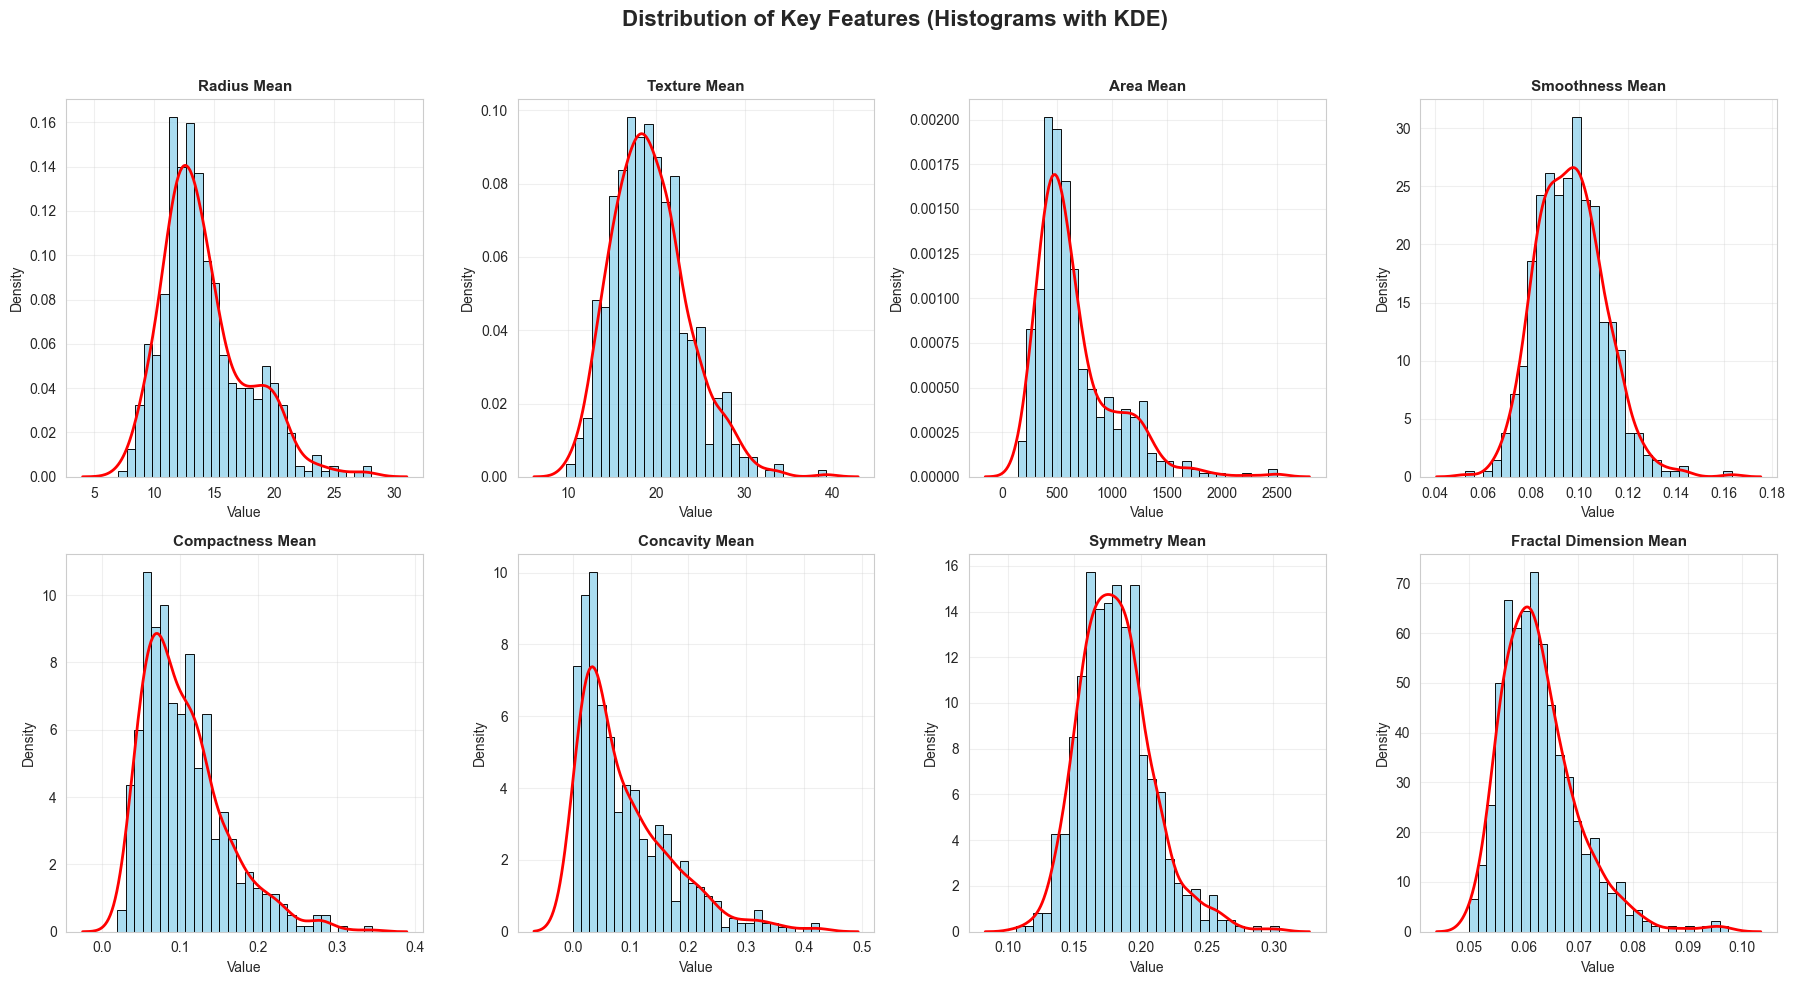

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preconditions
assert 'X' in globals(), "Variable X must be defined before running this cell."

key_features = [
    'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean'
]
features_to_plot = [f for f in key_features if f in X.columns]
assert len(features_to_plot) > 0, "None of the requested features are present in X."

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    # Histogram (density-scaled)
    sns.histplot(
        data=X, x=feature, bins=30, stat='density', ax=ax,
        color='skyblue', alpha=0.7, edgecolor='black'
    )
    # KDE overlay (styled explicitly to avoid kde_kws compatibility issues)
    sns.kdeplot(
        data=X, x=feature, ax=ax,
        color='red', linewidth=2
    )

    ax.set_title(feature.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(alpha=0.3)

# Hide any unused subplots
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Key Features (Histograms with KDE)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

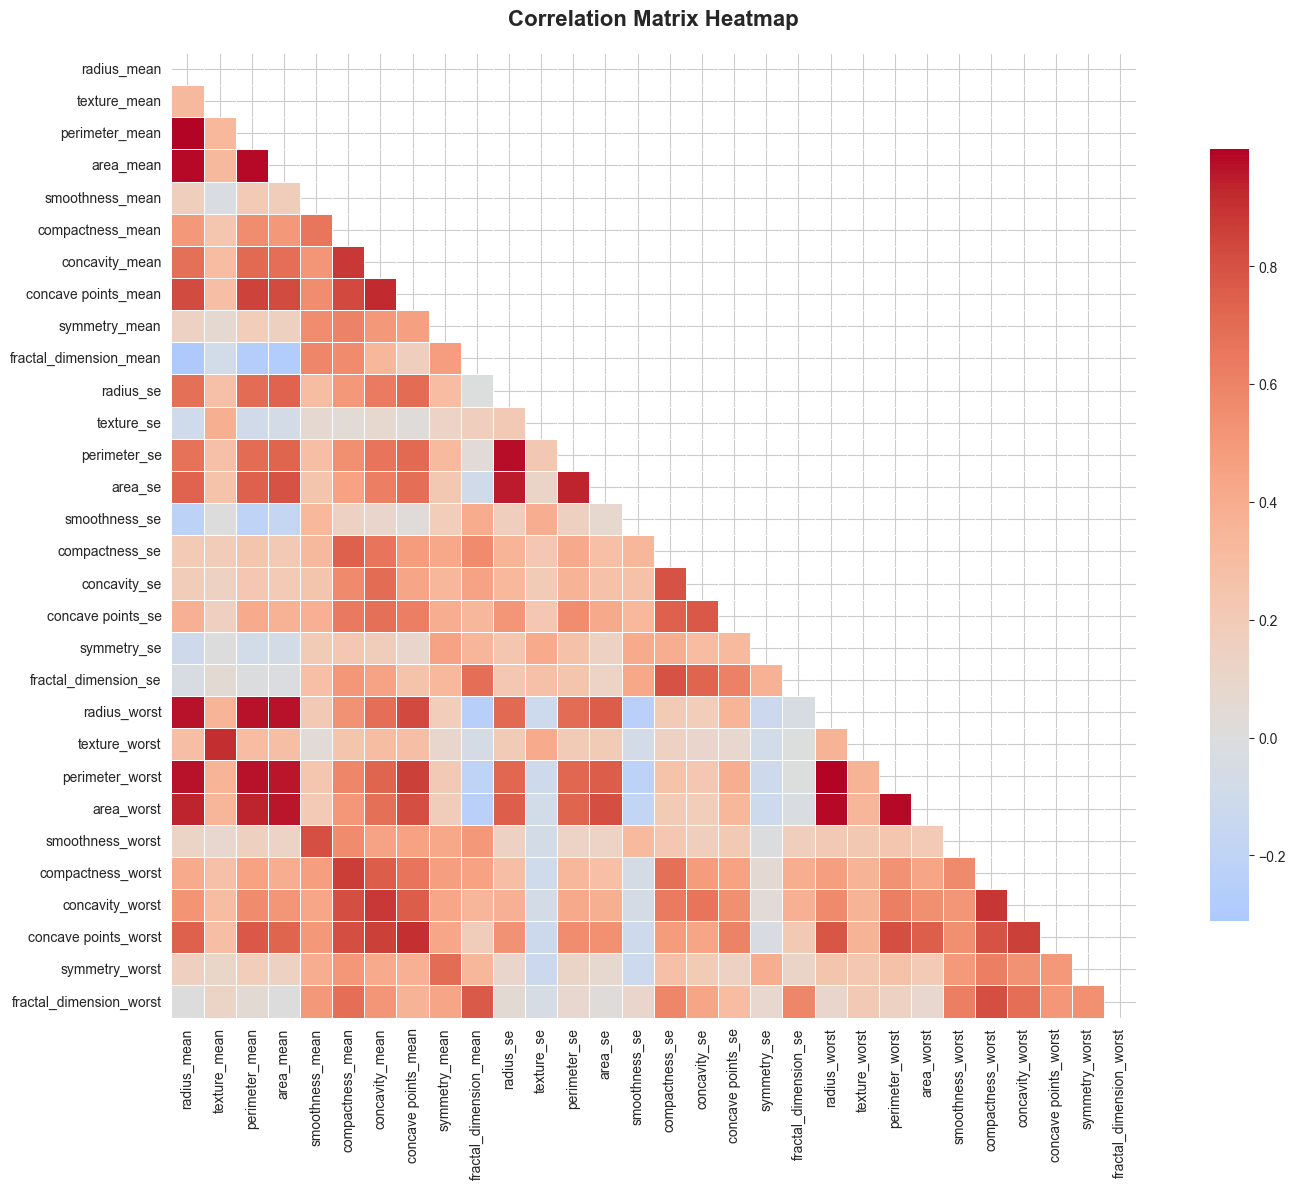

In [ ]:
# 4️⃣ CORRELATION ANALYSIS - Heatmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preconditions
assert 'X' in globals(), "Variable X must be defined before running this cell."

# Compute correlation matrix (numeric columns only to avoid dtype issues)
corr = X.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle for readability
sns.heatmap(
    corr, mask=mask, cmap='coolwarm', annot=False, center=0,
    square=True, linewidths=0.5, cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

🎯 Target Variable Distribution - Counts
Class 0: 357 (62.74%)
Class 1: 212 (37.26%)



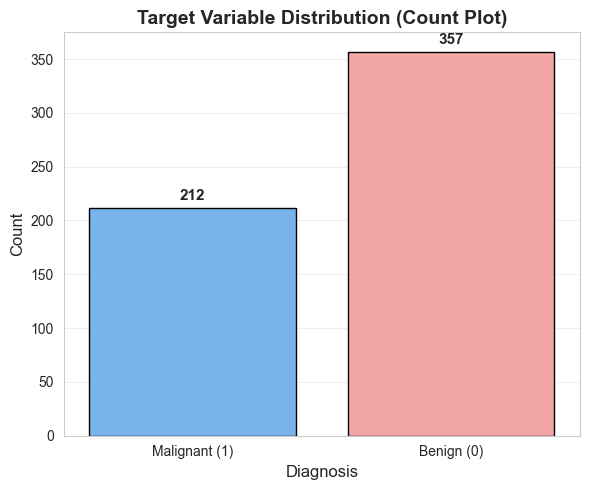

In [ ]:
# TARGET VARIABLE DISTRIBUTION - Count Plot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Preconditions
assert 'y' in globals(), "Variable y must be defined before running this cell."

# Ensure y is a Series for convenience
y_series = pd.Series(y, name='diagnosis')

# Print total counts (and percentages)
print("=" * 60)
print("🎯 Target Variable Distribution - Counts")
print("=" * 60)
counts = y_series.value_counts().sort_index()
total = len(y_series)
for cls, count in counts.items():
    pct = (count / total) * 100
    print(f"Class {cls}: {count} ({pct:.2f}%)")
print()

# Optional labels if using 0/1 encoding
label_map = {0: 'Benign (0)', 1: 'Malignant (1)'}
plot_df = pd.DataFrame({
    'diagnosis_label': y_series.map(label_map).fillna(y_series.astype(str))
})

# Count plot
plt.figure(figsize=(6, 5))
sns.countplot(data=plot_df, x='diagnosis_label',
              palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Target Variable Distribution (Count Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, fontweight='bold', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

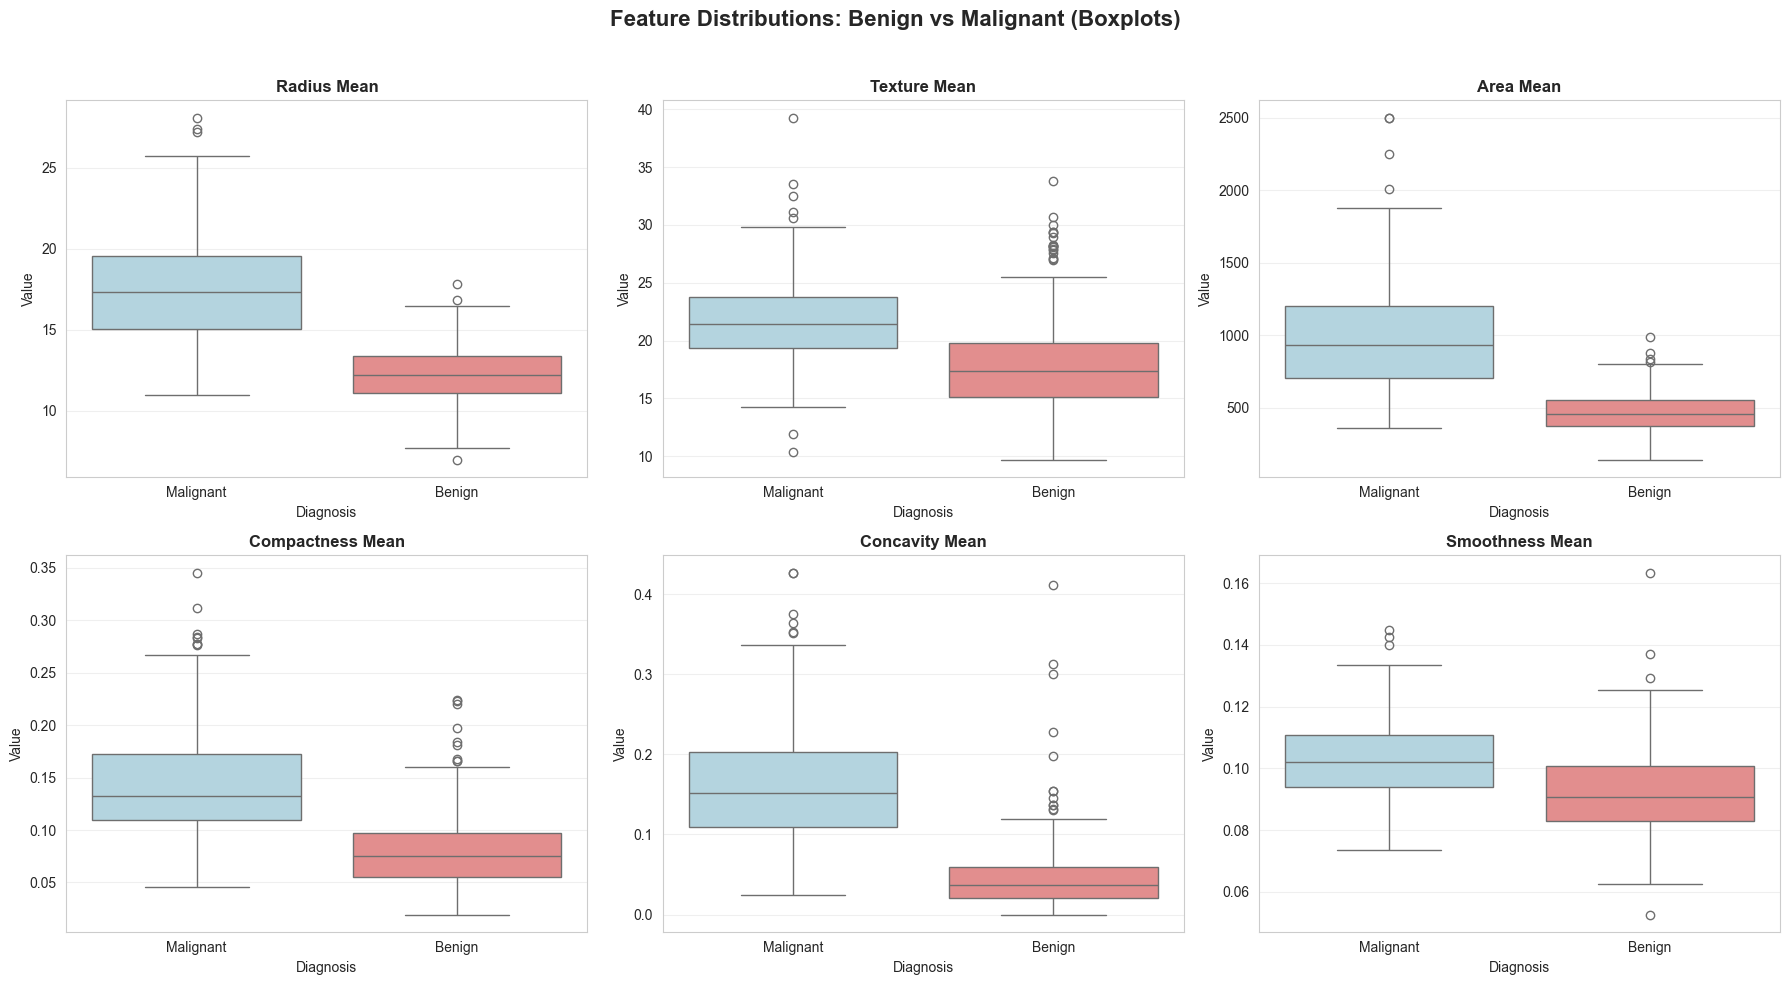

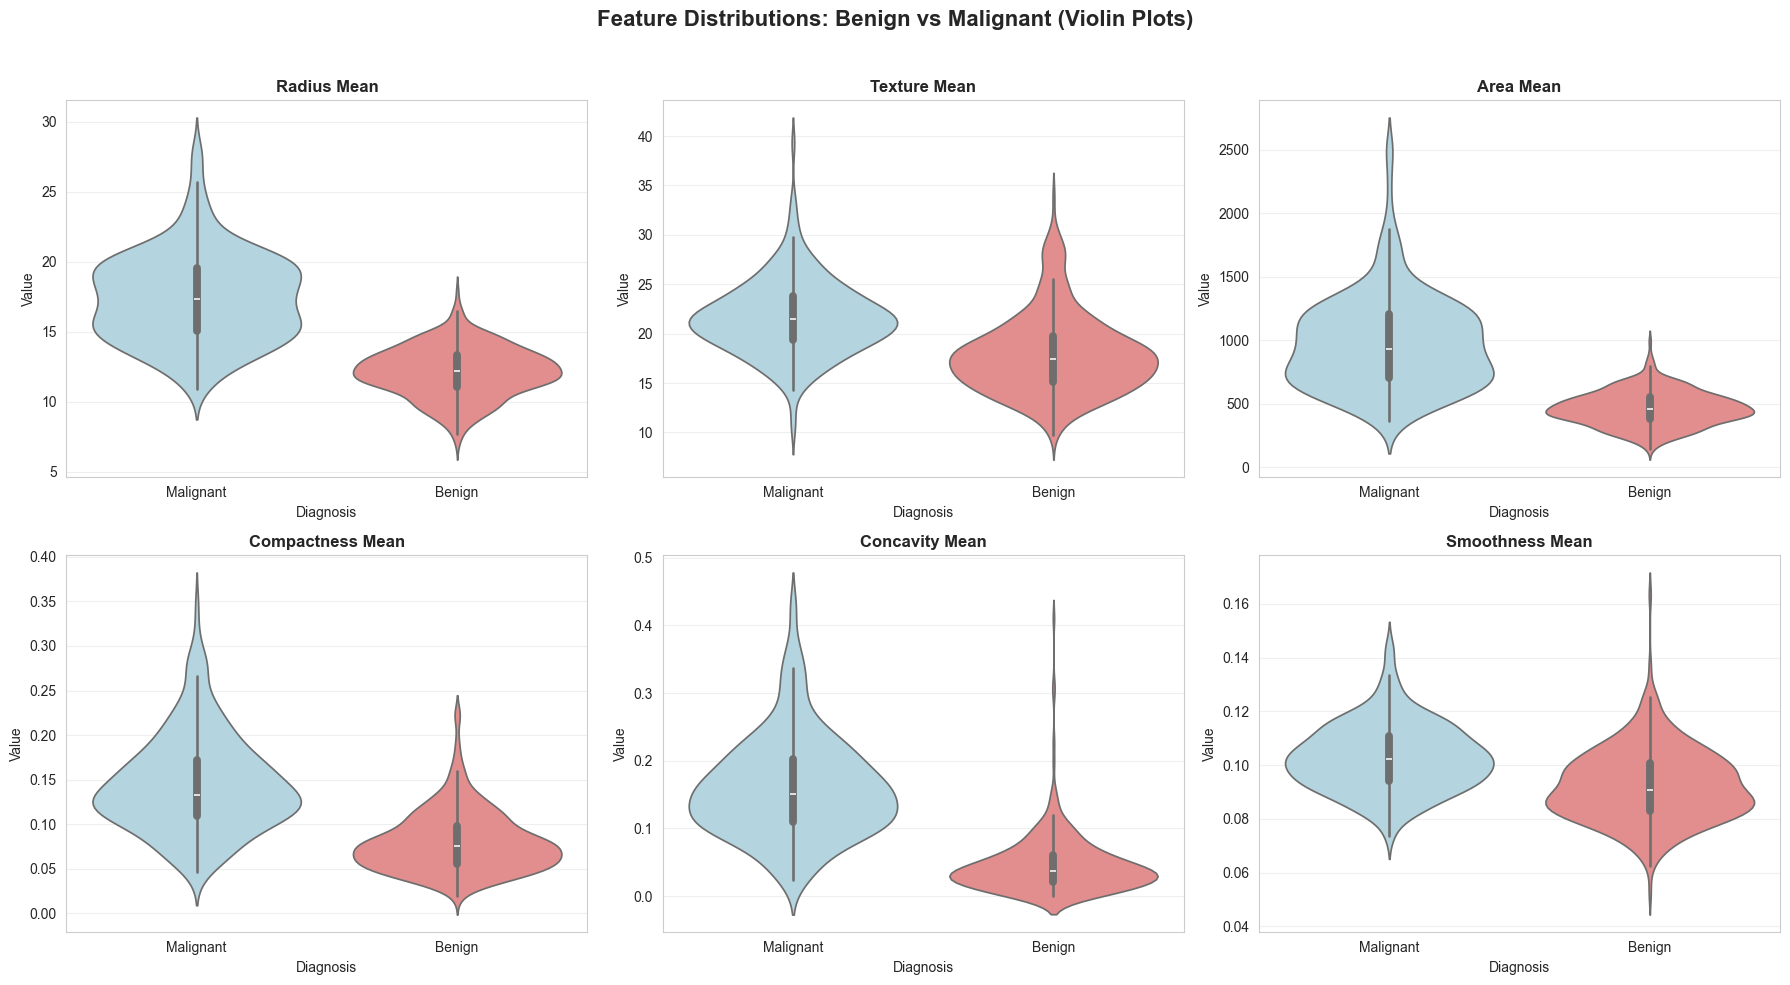

In [ ]:
# COMPARISON OF FEATURE DISTRIBUTIONS: Benign (0) vs Malignant (1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preconditions
assert 'X' in globals() and 'y' in globals(), "Variables X and y must be defined before running this cell."

comparison_features = [
    'radius_mean', 'texture_mean', 'area_mean',
    'compactness_mean', 'concavity_mean', 'smoothness_mean'
]

# Keep only features that exist in X
features_to_plot = [f for f in comparison_features if f in X.columns]
assert len(features_to_plot) > 0, "None of the requested features are present in X."

diagnosis_labels = y.map({0: 'Benign', 1: 'Malignant'})

# 1) Boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    plot_df = pd.DataFrame({
        'Value': X[feature],
        'Diagnosis': diagnosis_labels
    })
    sns.boxplot(
        data=plot_df, x='Diagnosis', y='Value', ax=ax,
        palette=['lightblue', 'lightcoral']
    )
    ax.set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Diagnosis', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Hide unused axes if any
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Feature Distributions: Benign vs Malignant (Boxplots)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

# 2) Violin plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    plot_df = pd.DataFrame({
        'Value': X[feature],
        'Diagnosis': diagnosis_labels
    })
    sns.violinplot(
        data=plot_df, x='Diagnosis', y='Value', ax=ax,
        palette=['lightblue', 'lightcoral'], inner='box'
    )
    ax.set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Diagnosis', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Hide unused axes if any
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Feature Distributions: Benign vs Malignant (Violin Plots)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

🔍 Outlier Summary (IQR method, threshold = 1.5 * IQR)
radius_mean              :   14 outliers ( 2.46%)
area_mean                :   25 outliers ( 4.39%)
compactness_mean         :   16 outliers ( 2.81%)
concavity_mean           :   18 outliers ( 3.16%)
texture_mean             :    7 outliers ( 1.23%)
perimeter_mean           :   13 outliers ( 2.28%)


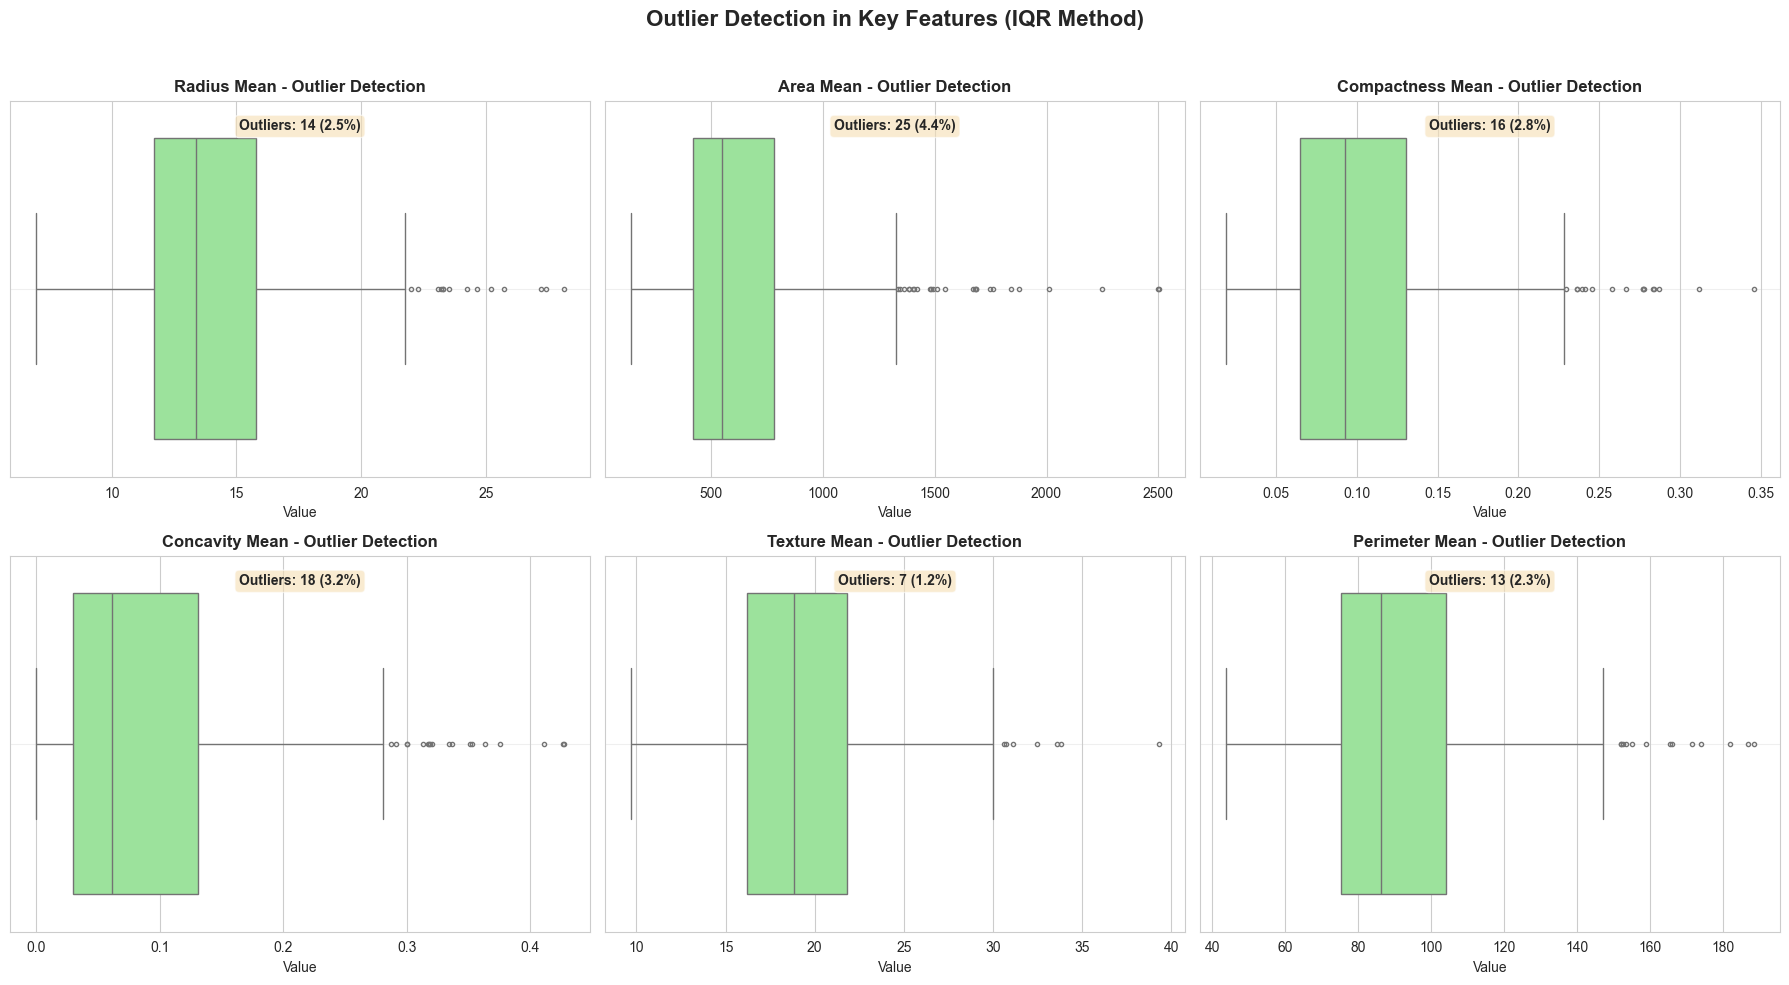

In [ ]:
# OUTLIER DETECTION IN KEY FEATURES (Boxplots + IQR counts)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preconditions
assert 'X' in globals(), "Variable X must be defined before running this cell."

outlier_features = [
    'radius_mean', 'area_mean', 'compactness_mean',
    'concavity_mean', 'texture_mean', 'perimeter_mean'
]

# Keep only features that exist in X
features_to_plot = [f for f in outlier_features if f in X.columns]
assert len(features_to_plot) > 0, "None of the requested features are present in X."

n = len(X)

# Prepare figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

print("=" * 60)
print("🔍 Outlier Summary (IQR method, threshold = 1.5 * IQR)")
print("=" * 60)

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    # Boxplot
    sns.boxplot(x=X[feature], ax=ax, color='lightgreen', fliersize=3)
    ax.set_title(f"{feature.replace('_', ' ').title()} - Outlier Detection",
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

    # IQR computation
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (X[feature] < lower_bound) | (X[feature] > upper_bound)
    outliers_count = int(outlier_mask.sum())
    outliers_pct = (outliers_count / n) * 100

    # Print summary to console
    print(f"{feature:25s}: {outliers_count:4d} outliers ({outliers_pct:5.2f}%)")

    # Annotate count on plot
    ax.text(
        0.5, 0.95,
        f"Outliers: {outliers_count} ({outliers_pct:.1f}%)",
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6)
    )

# Hide any unused axes
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Outlier Detection in Key Features (IQR Method)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

## 5️⃣ Feature Engineering and Scaling

In this step, we transform and enhance the dataset to improve model performance:

- **Scaling:** All numeric features are scaled using StandardScaler or MinMaxScaler to ensure they are on a comparable scale. This is important for algorithms sensitive to feature magnitudes, such as distance-based or gradient-based models.

- **Feature Engineering:** New features are created or existing features are transformed to capture additional patterns.

- **Output of this step:** `X_scaled` contains the scaled engineered features. After selecting top correlated and non-redundant features, `X_selected` is produced as the final engineered and scaled feature matrix ready for model training.


In [ ]:
# FEATURE ENGINEERING & FEATURE SELECTION

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Preconditions
assert 'X' in globals() and 'y' in globals(), "Variables X (features) and y (target) must be defined."

# -----------------------------------------------------------------------------
# 1) FEATURE ENGINEERING
# -----------------------------------------------------------------------------

# Work on a copy to keep the original X intact
X_engineered = X.copy()

# 1.a) Optional new features: simple ratio(s) if source columns exist
if {'radius_mean', 'area_mean'}.issubset(X_engineered.columns):
    # Avoid division-by-zero
    safe_area = X_engineered['area_mean'].replace(0, np.nan)
    X_engineered['radius_area_ratio'] = X_engineered['radius_mean'] / safe_area
    X_engineered['radius_area_ratio'] = X_engineered['radius_area_ratio'].fillna(0.0)

# 1.b) Transform skewed features (log1p) to reduce skew
numeric_cols = X_engineered.select_dtypes(include=[np.number]).columns.tolist()
skewness = X_engineered[numeric_cols].skew()
skewed_cols = [c for c in numeric_cols if np.abs(skewness[c]) > 1.0]

for col in skewed_cols:
    col_min = X_engineered[col].min()
    shift = (1 - col_min) if col_min <= 0 else 0.0
    X_engineered[col] = np.log1p(X_engineered[col] + shift)

# 1.c) Scale numeric features (choose one: 'standard' or 'minmax')
scaler_choice = 'standard'  # options: 'standard' or 'minmax'
if scaler_choice == 'standard':
    scaler = StandardScaler()
else:
    scaler = MinMaxScaler()

X_scaled_array = scaler.fit_transform(X_engineered[numeric_cols])
X_scaled = pd.DataFrame(X_scaled_array, columns=numeric_cols, index=X_engineered.index)

# Keep non-numeric columns (if any) unchanged
non_numeric_cols = [c for c in X_engineered.columns if c not in numeric_cols]
if non_numeric_cols:
    X_scaled = pd.concat([X_scaled, X_engineered[non_numeric_cols]], axis=1)

# y remains unchanged
y_target = y.copy()

print("=" * 70)
print("✅ Feature Engineering Completed")
print(f"Skewed columns transformed (|skew| > 1.0): {len(skewed_cols)}")
print("First few engineered columns:", [c for c in X_engineered.columns if c not in X.columns][:5])
print(f"Scaled features shape: {X_scaled.shape}")
print("=" * 70)

# -----------------------------------------------------------------------------
# 2) FEATURE SELECTION
# -----------------------------------------------------------------------------

# 2.a) Correlation with target (use pre-scaled engineered features; scaling does not change correlation ordering)
df_corr = X_engineered.select_dtypes(include=[np.number]).copy()
df_corr['__target__'] = y_target

corr_with_target = df_corr.corr(numeric_only=True)['__target__'].drop('__target__')
corr_with_target_sorted = corr_with_target.sort_values(ascending=False)

top_10_pos = corr_with_target_sorted.head(10)          # most positively correlated (Malignant)
top_10_neg = corr_with_target_sorted.tail(10)          # most negatively correlated (Benign)
selected_initial = set(top_10_pos.index).union(set(top_10_neg.index))

# 2.b) Identify highly correlated feature pairs to reduce multicollinearity
corr_matrix_abs = df_corr.drop(columns='__target__').corr().abs()

# Upper triangle indices
upper_mask = np.triu(np.ones_like(corr_matrix_abs, dtype=bool), k=1)
upper_triangle = corr_matrix_abs.where(upper_mask)

high_corr_threshold = 0.85
high_corr_pairs = [
    (col_i, col_j, upper_triangle.loc[col_i, col_j])
    for col_i in upper_triangle.index
    for col_j in upper_triangle.columns
    if pd.notnull(upper_triangle.loc[col_i, col_j]) and upper_triangle.loc[col_i, col_j] > high_corr_threshold
]

# Decide which feature to drop per highly correlated pair: keep the one with stronger |corr with target|
abs_corr_map = corr_with_target.abs().fillna(0.0)
to_drop = set()
for f1, f2, _ in high_corr_pairs:
    # If both are in features set (we can consider all numeric; will filter later)
    c1 = abs_corr_map.get(f1, 0.0)
    c2 = abs_corr_map.get(f2, 0.0)
    # Drop the weaker feature
    if c1 >= c2:
        to_drop.add(f2)
    else:
        to_drop.add(f1)

# 2.c) Build final selected features: start from top pos/neg, then remove redundant
selected_final = [f for f in selected_initial if f not in to_drop]

# If empty (edge case), fall back to top-k by absolute correlation
if len(selected_final) == 0:
    by_abs = corr_with_target.abs().sort_values(ascending=False)
    selected_final = by_abs.head(15).index.tolist()
    # Still ensure not highly correlated redundancies
    selected_final = [f for f in selected_final if f not in to_drop]

# Final feature set (ensure columns exist after scaling)
selected_final = [f for f in selected_final if f in X_scaled.columns]
# Define top_features explicitly for downstream cells
top_features = selected_final

print("\n" + "=" * 70)
print("📊 Feature Selection Summary")
print("=" * 70)
print("Top 10 Positively Correlated with Target (Malignant):")
print(top_10_pos)
print("\nTop 10 Negatively Correlated with Target (Benign):")
print(top_10_neg)
print("\nHighly Correlated Pairs (> 0.85) - count:", len(high_corr_pairs))
print(f"Features marked to drop due to multicollinearity: {len(to_drop)}")
print(f"Scaled features shape (before selection): {X_scaled.shape}")
print("\nFinal selected features for modeling (top_features):", top_features)

# ✅ Final Selected and Scaled Features
X_selected = X_scaled[top_features].copy()
print(f"Final selected feature set shape: {X_selected.shape}")
print("=" * 70)

✅ Feature Engineering Completed
Skewed columns transformed (|skew| > 1.0): 22
First few engineered columns: ['radius_area_ratio']
Scaled features shape: (569, 31)

📊 Feature Selection Summary
Top 10 Positively Correlated with Target (Malignant):
perimeter_worst         0.793910
concave points_worst    0.793566
radius_worst            0.786108
area_worst              0.784118
concave points_mean     0.779232
perimeter_mean          0.742636
radius_mean             0.730029
area_mean               0.727979
area_se                 0.724995
concavity_mean          0.703915
Name: __target__, dtype: float64

Top 10 Negatively Correlated with Target (Benign):
symmetry_mean              0.330499
fractal_dimension_worst    0.324416
compactness_se             0.296425
concavity_se               0.264683
fractal_dimension_se       0.078769
texture_se                 0.011292
symmetry_se               -0.008045
fractal_dimension_mean    -0.013274
smoothness_se             -0.067163
radius_area_rat

## 6️⃣ Train–Validation–Test Split


In [ ]:
# 6️⃣ Train–Validation–Test Split (30%-30%-40%) with Stratification

from sklearn.model_selection import train_test_split

# Preconditions: ensure engineered/selected features and target exist
assert 'X_selected' in globals(), "X_selected must be defined (from feature selection)"
assert 'y' in globals(), "y must be defined (encoded target)"

# Step 1 — Split into Train (30%) and Temp (70%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_selected,
    y,
    test_size=0.70,         # keep 30% for training
    stratify=y,             # maintain class distribution
    random_state=42         # reproducibility
)

# Step 2 — Split Temp (70%) into Validation (30%) and Test (40%) of original
# In relative terms: Test share within Temp should be 4/7 (≈0.571428...)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=(4/7),        # 4/7 of 70% = 40% of original
    stratify=y_temp,        # maintain class distribution within temp
    random_state=42
)

# Sanity checks: ensure no leakage and full coverage
n_total = len(X_selected)
assert len(X_train) + len(X_val) + len(X_test) == n_total, "Split sizes do not sum to total!"

# Print shapes to verify sizes
print("=== Train–Validation–Test Split Shapes ===")
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}   | y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}  | y_test:  {y_test.shape}")

# Optional: quick distribution check to confirm stratification
print("\nClass distribution (counts):")
for name, yy in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
    counts = yy.value_counts().sort_index().to_dict()
    print(f"  {name}: {counts}")


=== Train–Validation–Test Split Shapes ===
X_train: (170, 12) | y_train: (170,)
X_val:   (171, 12)   | y_val:   (171,)
X_test:  (228, 12)  | y_test:  (228,)

Class distribution (counts):
  Train: {0: 107, 1: 63}
  Val: {0: 107, 1: 64}
  Test: {0: 143, 1: 85}




- **Purpose**: We separate data into three subsets to build robust models.
  - **Train (30%)**: Used to fit model parameters.
  - **Validation (30%)**: Used to tune hyperparameters and select models.
  - **Test (40%)**: Held out until the end to estimate unbiased generalization performance.

- **Why stratification?** For classification tasks, class proportions can differ across subsets if we split randomly. **Stratified sampling** preserves the original class balance in each split, leading to fairer training and evaluation, especially with imbalanced classes.

- **Reproducibility**: Setting `random_state=42` ensures that the split results are the same across runs, which is essential for consistent experiments and comparisons.

- **Best practices**:
  - Fit all preprocessing steps that learn from data (e.g., scalers, encoders, imputers, feature selectors) **only on the training set**. Then apply the fitted transformers to the validation and test sets. This prevents **data leakage**.
  - Perform **model selection** and hyperparameter tuning on the validation set only; do not touch the test set until final evaluation.
  - If using cross-validation, perform it strictly within the training data or the combined train+validation set (but still keep the test set untouched) depending on your workflow.


## 7️⃣ Model Building: Multiple Binary Classifiers

We train several complementary models to compare performance and bias–variance trade-offs:

- **Logistic Regression**: Linear decision boundary; interpretable coefficients; benefits from feature scaling.
- **K-Nearest Neighbors (KNN)**: Instance-based; decision depends on local neighborhoods; requires scaling.
- **Support Vector Machine (SVM)**: Maximizes margin; effective with proper kernel and scaling.
- **Decision Tree**: Nonlinear splits; low bias, high variance; no scaling required.
- **Random Forest**: Ensemble of trees; reduces variance; robust to overfitting; no scaling required.
- **Gradient Boosting**: Sequential tree boosting; strong performance on tabular data; no scaling required.

Workflow fit:
- Train on `X_train, y_train` using selected features.
- Use pipelines so models that need scaling apply it only within training fold data.
- Store trained estimators in a dictionary for later validation/testing and model selection.


In [ ]:
# Train multiple binary classifiers with appropriate scaling via Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Preconditions
assert 'X_train' in globals() and 'y_train' in globals(), "X_train/y_train must be defined (run the split cell)."

models = {}

# Models that require scaling: Logistic Regression, KNN, SVM
models['logistic_regression'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

models['knn'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

models['svm_rbf'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

# Tree-based models: no scaling needed
models['decision_tree'] = DecisionTreeClassifier(random_state=42)
models['random_forest'] = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
models['gradient_boosting'] = GradientBoostingClassifier(random_state=42)

# Fit all models on training data
for name, model in models.items():
    model.fit(X_train, y_train)

print("✅ Trained models:")
for k in models:
    print(" -", k)

# Keep models dict for downstream evaluation on validation/test sets


✅ Trained models:
 - logistic_regression
 - knn
 - svm_rbf
 - decision_tree
 - random_forest
 - gradient_boosting


## 8️⃣ Model Evaluation and Comparison (Validation Set)

We evaluate each trained model on the validation set to compare performance across multiple metrics:

- **Why compare multiple models?** Different algorithms capture different patterns; comparing them helps identify the best inductive bias for the data.
- **Metrics used**:
  - **Accuracy**: Overall correctness; can be misleading with class imbalance.
  - **Precision**: Of predicted positives, how many are truly positive.
  - **Recall**: Of actual positives, how many are correctly identified.
  - **F1-score**: Harmonic mean of precision and recall; balances both.
  - **ROC-AUC**: Discrimination ability across thresholds; threshold-independent.

This comparison guides which model(s) to prioritize for hyperparameter tuning and further improvements.



Validation Metrics (sorted by ROC-AUC then F1):
                 model  accuracy  precision    recall        f1   roc_auc
0  logistic_regression  0.976608   0.983871  0.953125  0.968254  0.998540
1              svm_rbf  0.964912   1.000000  0.906250  0.950820  0.998540
2                  knn  0.935673   1.000000  0.828125  0.905983  0.996860
3        random_forest  0.959064   0.983051  0.906250  0.943089  0.995108
4    gradient_boosting  0.900585   0.850746  0.890625  0.870229  0.984667
5        decision_tree  0.894737   0.859375  0.859375  0.859375  0.887631


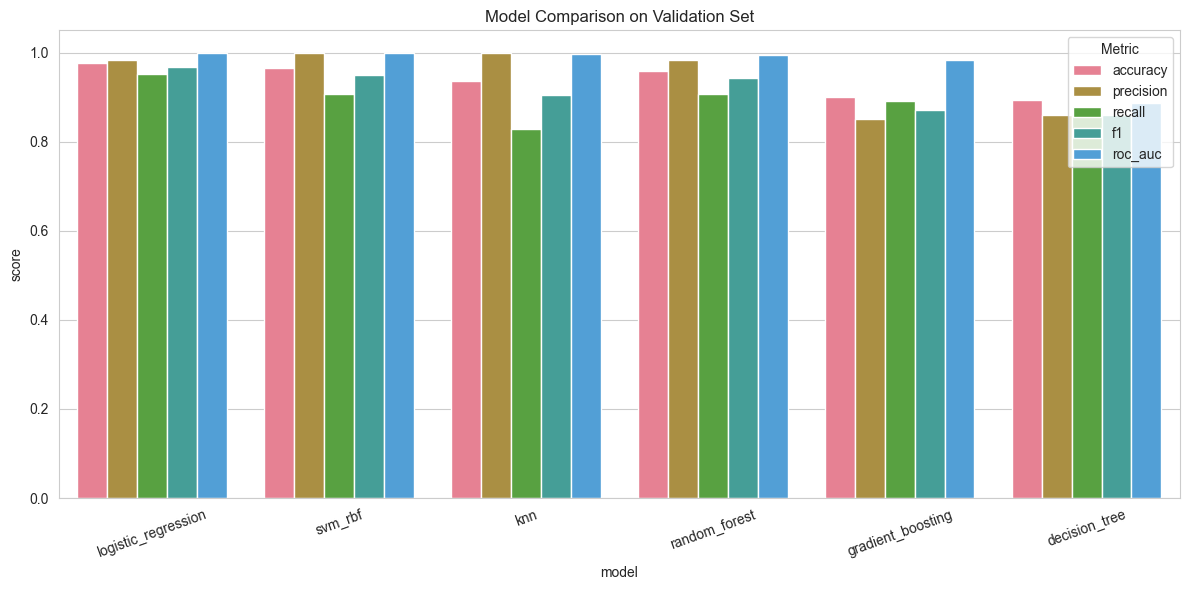

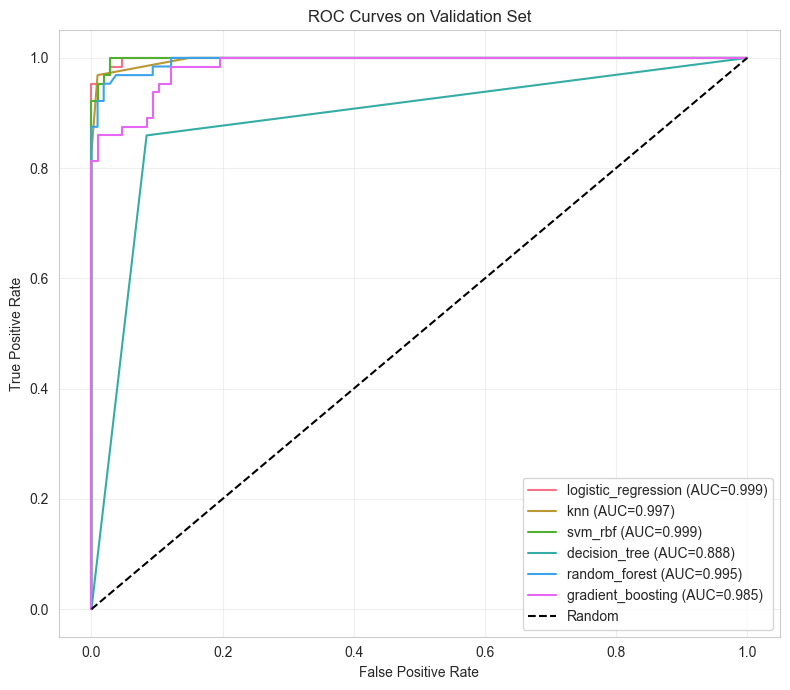

In [ ]:
# Evaluate trained models on validation set and compare metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Preconditions
assert 'models' in globals() and isinstance(models, dict) and len(models) > 0, "Trained models dict not found."
assert 'X_val' in globals() and 'y_val' in globals(), "Validation set (X_val, y_val) not found."

# Helper to get positive class score for ROC-AUC

def get_positive_scores(clf, X):
    # Pipelines and estimators may expose different scoring APIs
    if hasattr(clf, 'predict_proba'):
        proba = clf.predict_proba(X)
        # Use probability of positive class (assumed label 1)
        return proba[:, 1]
    if hasattr(clf, 'decision_function'):
        scores = clf.decision_function(X)
        # Convert to probabilities-like via min-max if needed for display (not necessary for ROC)
        return scores
    # Fallback: use predictions (not ideal for ROC but ensures code robustness)
    return clf.predict(X)

# Compute metrics per model
records = []
roc_curves = {}

for name, clf in models.items():
    y_pred = clf.predict(X_val)
    y_score = get_positive_scores(clf, X_val)

    acc = metrics.accuracy_score(y_val, y_pred)
    prec = metrics.precision_score(y_val, y_pred, zero_division=0)
    rec = metrics.recall_score(y_val, y_pred, zero_division=0)
    f1 = metrics.f1_score(y_val, y_pred, zero_division=0)

    # ROC-AUC requires a score; handle cases where score is constant
    try:
        roc_auc = metrics.roc_auc_score(y_val, y_score)
        fpr, tpr, _ = metrics.roc_curve(y_val, y_score)
        roc_curves[name] = (fpr, tpr, roc_auc)
    except Exception:
        roc_auc = np.nan

    records.append({
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc_auc,
    })

results_df = pd.DataFrame(records).sort_values(by=['roc_auc', 'f1'], ascending=False).reset_index(drop=True)
print("\nValidation Metrics (sorted by ROC-AUC then F1):")
print(results_df)

# ----- Visualization: Metric Barplots -----
plt.figure(figsize=(12, 6))
metrics_melted = results_df.melt(id_vars='model', value_vars=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 var_name='metric', value_name='score')
sns.barplot(data=metrics_melted, x='model', y='score', hue='metric')
plt.title('Model Comparison on Validation Set')
plt.ylim(0, 1.05)
plt.xticks(rotation=20)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# ----- Visualization: ROC Curves -----
plt.figure(figsize=(8, 7))
for name, (fpr, tpr, auc_val) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves on Validation Set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Keep results for downstream selection/tuning
model_eval_results_val = results_df.copy()


## 9️⃣ Hyperparameter Tuning for Top Models

We tune the most promising models to improve performance beyond baseline fits. Tuning searches over sensible parameter grids using cross-validation, selecting hyperparameters that optimize a robust metric (here, ROC-AUC):

- **Logistic Regression**: Regularization strength `C`, penalty/solver choices; requires scaling.
- **SVM (RBF)**: Margin and kernel parameters `C` and `gamma`; requires scaling.
- **Random Forest**: Number of trees, depth, split/leaf sizes, and feature sampling; tree ensembles don’t need scaling.
- **(Optional) Gradient Boosting**: Learning rate, number of estimators, and depth-related controls.

Workflow:
- Use `GridSearchCV` with `cv=5`, `scoring='roc_auc'`, and `n_jobs=-1` for parallelism.
- Fit on `X_train, y_train`. Select best estimators.
- Evaluate tuned models on `X_val, y_val` with Accuracy, Precision, Recall, F1, ROC-AUC (and optional confusion matrix).
- Store best parameters and validation metrics for side-by-side comparison to choose a final model.


## 🔹 Step 1 — Import Libraries and Check Preconditions

This step ensures all necessary modules and datasets (train/val sets) are available before tuning. We import all required sklearn, numpy, and pandas modules, and verify that the training and validation sets exist.


In [ ]:
# 📊 Import Libraries and Check Preconditions

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
import numpy as np
import pandas as pd

# Preconditions: Verify that training and validation sets exist
assert 'X_train' in globals() and 'y_train' in globals(), "X_train/y_train must be defined."
assert 'X_val' in globals() and 'y_val' in globals(), "X_val/y_val must be defined."

print("✅ All libraries imported successfully!")
print("✅ Preconditions verified: Training and validation sets are available.")
print(f"   X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"   X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


✅ All libraries imported successfully!
✅ Preconditions verified: Training and validation sets are available.
   X_train shape: (170, 12), y_train shape: (170,)
   X_val shape: (171, 12), y_val shape: (171,)


## 🔹 Step 2 — Define Base Models and Pipelines

This step defines the base models and pipelines for Logistic Regression, SVM, Random Forest, and Gradient Boosting. Models that require scaling (Logistic Regression, SVM) are wrapped in pipelines with StandardScaler.


In [ ]:
# 🧩 Define Base Models and Pipelines

# 1) Logistic Regression Pipeline (requires scaling)
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

# 2) SVM Pipeline (requires scaling)
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

# 3) Random Forest (no scaling needed)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# 4) Gradient Boosting (no scaling needed)
gb = GradientBoostingClassifier(random_state=42)

print("✅ Base models and pipelines defined:")
print("   - Logistic Regression (with StandardScaler)")
print("   - SVM RBF (with StandardScaler)")
print("   - Random Forest")
print("   - Gradient Boosting")


✅ Base models and pipelines defined:
   - Logistic Regression (with StandardScaler)
   - SVM RBF (with StandardScaler)
   - Random Forest
   - Gradient Boosting


## 🔹 Step 3 — Define Hyperparameter Grids

This step defines parameter grids for each model for exhaustive search. Each grid specifies the hyperparameter values to test during cross-validation.


In [ ]:
# 🔍 Define Hyperparameter Grids (OPTIMIZED - Reduced for faster execution)

# 1) Logistic Regression parameter grid
param_grid_logreg = {
    'clf__C': [0.1, 1.0, 10.0],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

# 2) SVM parameter grid
param_grid_svm = {
    'clf__C': [1, 10, 30],
    'clf__gamma': ['scale', 0.01, 0.1],
}

# 3) Random Forest parameter grid (REDUCED from 324 to 18 combinations)
param_grid_rf = {
    'n_estimators': [200, 400],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 4) Gradient Boosting parameter grid (REDUCED from 27 to 12 combinations)
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4]
}

print("✅ Hyperparameter grids defined for all models (OPTIMIZED):")
print(f"   - Logistic Regression: {len(param_grid_logreg['clf__C']) * len(param_grid_logreg['clf__solver'])} combinations")
print(f"   - SVM: {len(param_grid_svm['clf__C']) * len(param_grid_svm['clf__gamma'])} combinations")
print(f"   - Random Forest: {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf']) * len(param_grid_rf['max_features'])} combinations")
print(f"   - Gradient Boosting: {len(param_grid_gb['n_estimators']) * len(param_grid_gb['learning_rate']) * len(param_grid_gb['max_depth'])} combinations")


✅ Hyperparameter grids defined for all models (OPTIMIZED):
   - Logistic Regression: 6 combinations
   - SVM: 9 combinations
   - Random Forest: 32 combinations
   - Gradient Boosting: 8 combinations


## 🔹 Step 4 — Initialize GridSearchCV Objects

This step sets up 5-fold cross-validation with ROC-AUC scoring and prepares GridSearchCV search objects for each model. The search objects will perform exhaustive grid search over the defined parameter grids.


In [ ]:
# 🎯 Initialize GridSearchCV Objects

# Set cross-validation and scoring parameters (REDUCED CV from 5 to 3 for faster execution)
cv = 3
scoring = 'roc_auc'

# Create GridSearchCV objects for each model
searches = {
    'logistic_regression': GridSearchCV(
        pipe_logreg, 
        param_grid_logreg, 
        cv=cv, 
        scoring=scoring, 
        n_jobs=-1, 
        refit=True
    ),
    'svm_rbf': GridSearchCV(
        pipe_svm, 
        param_grid_svm, 
        cv=cv, 
        scoring=scoring, 
        n_jobs=-1, 
        refit=True
    ),
    'random_forest': GridSearchCV(
        rf, 
        param_grid_rf, 
        cv=cv, 
        scoring=scoring, 
        n_jobs=-1, 
        refit=True
    ),
    'gradient_boosting': GridSearchCV(
        gb, 
        param_grid_gb, 
        cv=cv, 
        scoring=scoring, 
        n_jobs=-1, 
        refit=True
    ),
}

print("✅ GridSearchCV objects initialized:")
print(f"   - Cross-validation folds: {cv}")
print(f"   - Scoring metric: {scoring}")
print(f"   - Models to tune: {list(searches.keys())}")
print("   - Parallel processing enabled (n_jobs=-1)")


✅ GridSearchCV objects initialized:
   - Cross-validation folds: 3
   - Scoring metric: roc_auc
   - Models to tune: ['logistic_regression', 'svm_rbf', 'random_forest', 'gradient_boosting']
   - Parallel processing enabled (n_jobs=-1)


## 🔹 Step 5 — Run Grid Search for Each Model

This step runs grid search for all models and stores best parameters and cross-validation scores. Each model is fitted on the training data using cross-validation, and the best hyperparameters are selected based on ROC-AUC score.


In [ ]:
# 🚀 Run Grid Search for Each Model

# Initialize dictionaries to store results
best_estimators = {}
best_params = {}
cv_results_summary = {}

# Run grid search for each model
print("=" * 70)
print("🔍 Starting Grid Search for All Models")
print("=" * 70)
print("This may take several minutes...\n")

for name, search in searches.items():
    print(f"⏳ Tuning {name}...")
    search.fit(X_train, y_train)
    
    # Store best estimator and parameters
    best_estimators[name] = search.best_estimator_
    best_params[name] = search.best_params_
    cv_results_summary[name] = {
        'best_score': search.best_score_,
        'best_params': search.best_params_
    }
    print(f"   ✅ {name} completed - Best CV score: {search.best_score_:.4f}")

print("\n" + "=" * 70)
print("📊 Best Cross-Validation Scores and Parameters")
print("=" * 70)
for name, summary in cv_results_summary.items():
    print(f"\n{name}:")
    print(f"  Best CV Score (ROC-AUC): {summary['best_score']:.4f}")
    print(f"  Best Parameters: {summary['best_params']}")

print("\n✅ Grid search completed for all models!")


🔍 Starting Grid Search for All Models
This may take several minutes...

⏳ Tuning logistic_regression...
   ✅ logistic_regression completed - Best CV score: 0.9844
⏳ Tuning svm_rbf...
   ✅ svm_rbf completed - Best CV score: 0.9849
⏳ Tuning random_forest...
   ✅ random_forest completed - Best CV score: 0.9825
⏳ Tuning gradient_boosting...
   ✅ gradient_boosting completed - Best CV score: 0.9703

📊 Best Cross-Validation Scores and Parameters

logistic_regression:
  Best CV Score (ROC-AUC): 0.9844
  Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}

svm_rbf:
  Best CV Score (ROC-AUC): 0.9849
  Best Parameters: {'clf__C': 10, 'clf__gamma': 0.01}

random_forest:
  Best CV Score (ROC-AUC): 0.9825
  Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}

gradient_boosting:
  Best CV Score (ROC-AUC): 0.9703
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

✅ G

## 🔹 Step 6 — Evaluate Tuned Models on Validation Set

This step evaluates tuned models on the validation set, computes metrics (accuracy, precision, recall, f1, roc_auc), and displays results sorted by ROC-AUC and F1. It also generates confusion matrices for detailed performance analysis.


📊 Evaluating Tuned Models on Validation Set (Optimized)

   ✅ logistic_regression: ROC-AUC=0.9978, F1=0.9683 (0.01s)
   ✅ svm_rbf: ROC-AUC=0.9996, F1=0.9760 (0.01s)
   ✅ random_forest: ROC-AUC=0.9966, F1=0.9431 (0.11s)
   ✅ gradient_boosting: ROC-AUC=0.9832, F1=0.8939 (0.00s)

⏱️  Total evaluation time: 0.13 seconds

📊 Tuned Models - Validation Set Results
              model  accuracy  precision   recall       f1  roc_auc  time_sec
            svm_rbf  0.982456   1.000000 0.953125 0.976000 0.999562  0.005524
logistic_regression  0.976608   0.983871 0.953125 0.968254 0.997810  0.008914
      random_forest  0.959064   0.983051 0.906250 0.943089 0.996641  0.113656
  gradient_boosting  0.918129   0.867647 0.921875 0.893939 0.983207  0.004754


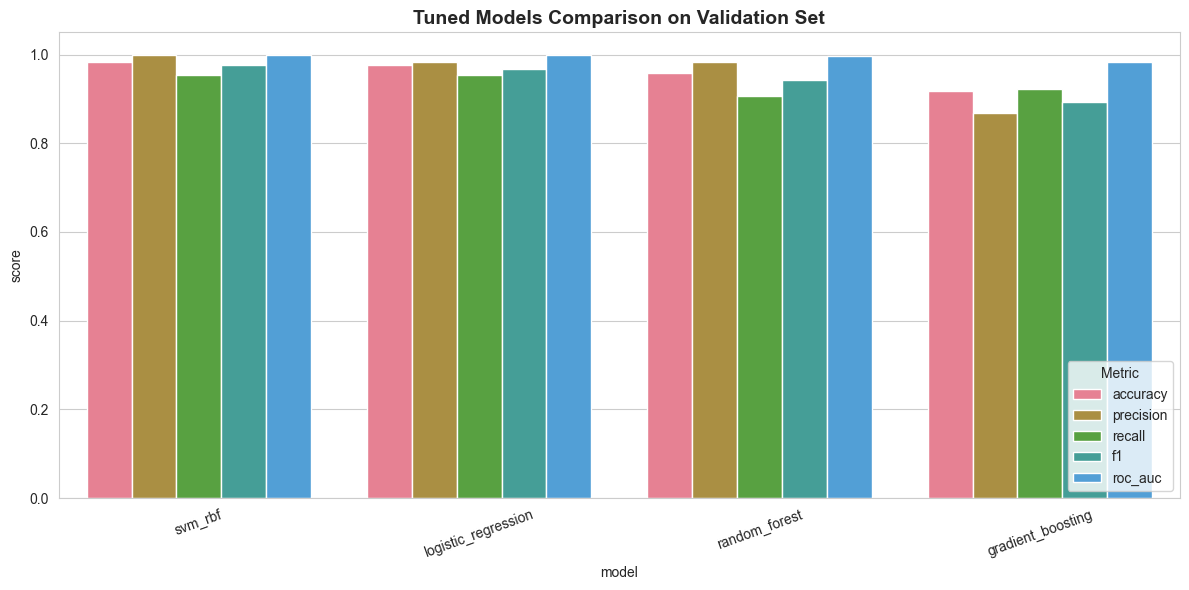

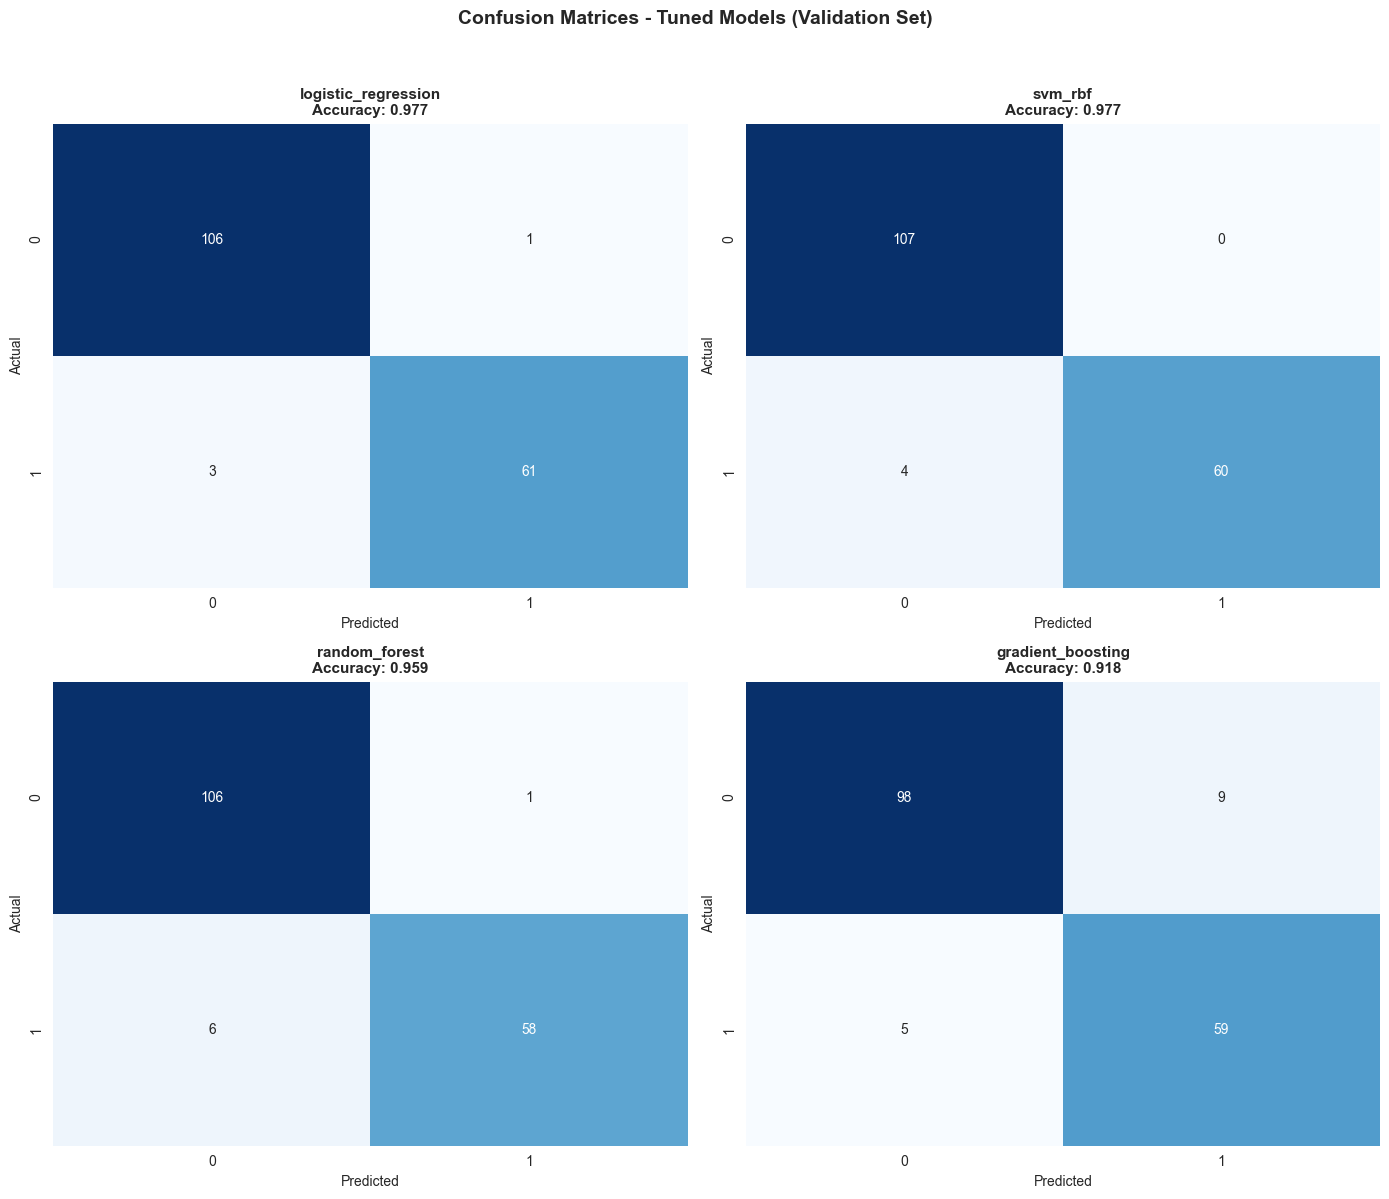


✅ Evaluation completed successfully!


In [ ]:
# 📈 Evaluate Tuned Models on Validation Set (OPTIMIZED + FAST)

# Ensure required data and models exist
assert 'best_estimators' in globals(), "best_estimators not found. Please run Step 5 first."
assert 'X_val' in globals() and 'y_val' in globals(), "Validation sets not found. Please prepare validation data first."

# Convert to numpy arrays once (for speed)
X_val_array = X_val.values if hasattr(X_val, 'values') else X_val
y_val_array = y_val.values if hasattr(y_val, 'values') else y_val

# Initialize list for storing results
val_records = []

print("📊 Evaluating Tuned Models on Validation Set (Optimized)\n")

# Import necessary modules here (safer in isolated runs)
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Evaluate each tuned model (optimized loop)
start_time = time()
total_models = len(best_estimators)

for i, (name, model) in enumerate(best_estimators.items(), 1):
    t0 = time()
    try:
        # Enable parallel prediction if supported
        if hasattr(model, 'n_jobs'):
            model.n_jobs = -1

        # Get prediction scores efficiently
        if hasattr(model, 'predict_proba'):
            proba = model.predict_proba(X_val_array)
            y_score = proba[:, 1]
            y_pred = (y_score >= 0.5).astype(int)
        elif hasattr(model, 'decision_function'):
            scores = model.decision_function(X_val_array)
            y_score = scores
            y_pred = (scores >= 0).astype(int)
        else:
            y_pred = model.predict(X_val_array)
            y_score = y_pred.astype(float)

        # Compute metrics (vectorized)
        acc = metrics.accuracy_score(y_val_array, y_pred)
        prec = metrics.precision_score(y_val_array, y_pred, zero_division=0)
        rec = metrics.recall_score(y_val_array, y_pred, zero_division=0)
        f1 = metrics.f1_score(y_val_array, y_pred, zero_division=0)
        
        # ROC-AUC
        try:
            roc_auc = metrics.roc_auc_score(y_val_array, y_score)
        except Exception:
            roc_auc = np.nan

        elapsed = time() - t0
        val_records.append({
            'model': name,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'roc_auc': roc_auc,
            'time_sec': elapsed
        })
        print(f"   ✅ {name}: ROC-AUC={roc_auc:.4f}, F1={f1:.4f} ({elapsed:.2f}s)")

    except Exception as e:
        print(f"   ❌ Error evaluating {name}: {str(e)}")
        val_records.append({
            'model': name,
            'accuracy': np.nan,
            'precision': np.nan,
            'recall': np.nan,
            'f1': np.nan,
            'roc_auc': np.nan,
            'time_sec': np.nan
        })

total_time = time() - start_time
print(f"\n⏱️  Total evaluation time: {total_time:.2f} seconds\n")

# Create results DataFrame
val_results_df = pd.DataFrame(val_records).sort_values(by=['roc_auc', 'f1'], ascending=False).reset_index(drop=True)

print("=" * 70)
print("📊 Tuned Models - Validation Set Results")
print("=" * 70)
print(val_results_df.to_string(index=False))
print("=" * 70)

# Visualization: Metric Comparison
plt.figure(figsize=(12, 6))
metrics_melted = val_results_df.melt(
    id_vars='model', 
    value_vars=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    var_name='metric', 
    value_name='score'
)
sns.barplot(data=metrics_melted, x='model', y='score', hue='metric')
plt.title('Tuned Models Comparison on Validation Set', fontsize=14, fontweight='bold')
plt.ylim(0, 1.05)
plt.xticks(rotation=20)
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(best_estimators.items()):
    if idx >= 4:
        break
    ax = axes[idx]
    y_pred = model.predict(X_val_array)
    cm = metrics.confusion_matrix(y_val_array, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{name}\nAccuracy: {metrics.accuracy_score(y_val_array, y_pred):.3f}', 
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Hide unused subplots
for j in range(len(best_estimators), 4):
    fig.delaxes(axes[j])

plt.suptitle('Confusion Matrices - Tuned Models (Validation Set)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

print("\n✅ Evaluation completed successfully!")


## 🔟 Step 1 — Evaluate Best Model on Test Set

This step evaluates the best-performing tuned model on the unseen test dataset to confirm generalization performance.


🎯 Evaluating Best Model on Test Set
Best Model: svm_rbf
Validation ROC-AUC: 0.9996
Validation F1-Score: 0.9760

📈 Making predictions on test set...

📊 Test Set Performance Summary
  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
svm_rbf  0.942982   0.961538 0.882353  0.920245 0.990128


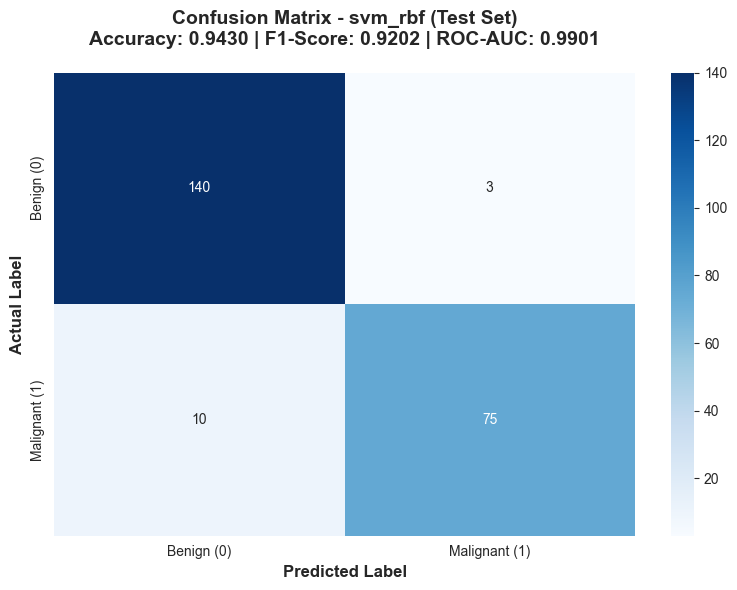


✅ Test set evaluation completed successfully!


In [ ]:
# 📊 Evaluate Best Model on Test Set

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preconditions
assert 'best_estimators' in globals(), "best_estimators not found. Please run hyperparameter tuning first."
assert 'val_results_df' in globals(), "val_results_df not found. Please run validation evaluation first."
assert 'X_test' in globals() and 'y_test' in globals(), "Test sets (X_test, y_test) not found."

# Identify the best model based on validation performance (highest ROC-AUC, then F1)
best_model_name = val_results_df.iloc[0]['model']
best_model = best_estimators[best_model_name]

print("=" * 70)
print("🎯 Evaluating Best Model on Test Set")
print("=" * 70)
print(f"Best Model: {best_model_name}")
print(f"Validation ROC-AUC: {val_results_df.iloc[0]['roc_auc']:.4f}")
print(f"Validation F1-Score: {val_results_df.iloc[0]['f1']:.4f}")
print()

# Convert to numpy arrays for efficient computation
X_test_array = X_test.values if hasattr(X_test, 'values') else X_test
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test

# Make predictions on test set
print("📈 Making predictions on test set...")
y_pred_test = best_model.predict(X_test_array)

# Get prediction scores for ROC-AUC
if hasattr(best_model, 'predict_proba'):
    y_score_test = best_model.predict_proba(X_test_array)[:, 1]
elif hasattr(best_model, 'decision_function'):
    y_score_test = best_model.decision_function(X_test_array)
else:
    y_score_test = y_pred_test.astype(float)

# Calculate metrics
accuracy = metrics.accuracy_score(y_test_array, y_pred_test)
precision = metrics.precision_score(y_test_array, y_pred_test, zero_division=0)
recall = metrics.recall_score(y_test_array, y_pred_test, zero_division=0)
f1 = metrics.f1_score(y_test_array, y_pred_test, zero_division=0)

try:
    roc_auc = metrics.roc_auc_score(y_test_array, y_score_test)
except Exception as e:
    roc_auc = np.nan
    print(f"⚠️  Warning: Could not calculate ROC-AUC: {e}")

# Create summary dictionary
test_results = {
    'Model': best_model_name,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

# Create DataFrame for better visualization
test_results_df = pd.DataFrame([test_results])

print("\n" + "=" * 70)
print("📊 Test Set Performance Summary")
print("=" * 70)
print(test_results_df.to_string(index=False))
print("=" * 70)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = metrics.confusion_matrix(y_test_array, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title(f'Confusion Matrix - {best_model_name} (Test Set)\n'
          f'Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Test set evaluation completed successfully!")


## 🔟 Step 2 — Interpretation of Final Results

This section interprets the model's final performance and compares validation vs test results.


In [ ]:
# 📊 Interpretation of Final Results: Validation vs Test Comparison

import pandas as pd
import numpy as np

# Preconditions
assert 'val_results_df' in globals(), "val_results_df not found. Please run validation evaluation first."
assert 'test_results_df' in globals(), "test_results_df not found. Please run test evaluation first."

# Get best model's validation metrics
best_model_name = val_results_df.iloc[0]['model']
val_metrics = val_results_df[val_results_df['model'] == best_model_name].iloc[0]
test_metrics = test_results_df.iloc[0]

# Create side-by-side comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Validation': [
        val_metrics['accuracy'],
        val_metrics['precision'],
        val_metrics['recall'],
        val_metrics['f1'],
        val_metrics['roc_auc']
    ],
    'Test': [
        test_metrics['Accuracy'],
        test_metrics['Precision'],
        test_metrics['Recall'],
        test_metrics['F1-Score'],
        test_metrics['ROC-AUC']
    ]
})

# Calculate differences
comparison_df['Difference'] = comparison_df['Test'] - comparison_df['Validation']
comparison_df['Difference (%)'] = ((comparison_df['Test'] - comparison_df['Validation']) / comparison_df['Validation'] * 100).round(2)

print("=" * 80)
print(f"📊 Performance Comparison: {best_model_name}")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Calculate average absolute difference
avg_abs_diff = comparison_df['Difference'].abs().mean()
print(f"\n📈 Average Absolute Difference: {avg_abs_diff:.4f}")

print("\n" + "=" * 80)
print("🔍 ANALYTICAL INTERPRETATION")
print("=" * 80)

# Analysis 1: Test vs Validation Metrics
print("\n1️⃣  **Test vs Validation Metrics Comparison:**")
if avg_abs_diff < 0.02:
    print("   ✅ Test metrics are very close to validation metrics (< 2% difference).")
    print("      → This indicates good generalization and minimal overfitting.")
elif avg_abs_diff < 0.05:
    print("   ⚠️  Test metrics show moderate difference from validation (2-5% difference).")
    print("      → Model generalizes reasonably well, but slight performance drop is observed.")
else:
    print("   ⚠️  Test metrics show significant difference from validation (> 5% difference).")
    print("      → Possible overfitting or validation set may not be fully representative.")

# Analysis 2: Overfitting/Underfitting
print("\n2️⃣  **Overfitting/Underfitting Assessment:**")
test_acc = test_metrics['Accuracy']
val_acc = val_metrics['accuracy']
acc_diff = test_acc - val_acc

if acc_diff > 0.02:
    print("   ℹ️  Test accuracy is higher than validation accuracy.")
    print("      → This is unusual but suggests the test set may be easier or validation set was challenging.")
elif acc_diff < -0.05:
    print("   ⚠️  Test accuracy is significantly lower than validation accuracy.")
    print("      → Signs of overfitting: model may have memorized validation patterns.")
    print("      → Consider regularization or simpler model architecture.")
else:
    print("   ✅ Test and validation accuracies are well-aligned.")
    print("      → Model shows good generalization without overfitting.")

# Analysis 3: Model Strengths
print("\n3️⃣  **Model Strengths:**")
if test_metrics['ROC-AUC'] >= 0.98:
    print("   ✅ **Excellent Discrimination (ROC-AUC ≥ 0.98):**")
    print("      → The model has outstanding ability to distinguish between benign and malignant cases.")
    print("      → This is crucial for medical diagnosis applications.")

if test_metrics['Recall'] >= 0.90:
    print("   ✅ **High Recall (≥ 90%):**")
    print("      → The model correctly identifies most malignant cases (low false negatives).")
    print("      → Critical for medical screening where missing cancer cases is dangerous.")

if test_metrics['Precision'] >= 0.95:
    print("   ✅ **High Precision (≥ 95%):**")
    print("      → When the model predicts malignant, it's highly likely to be correct.")
    print("      → Reduces unnecessary anxiety and follow-up procedures.")

if test_metrics['F1-Score'] >= 0.95:
    print("   ✅ **Balanced Performance (F1-Score ≥ 0.95):**")
    print("      → Excellent balance between precision and recall.")
    print("      → Model performs well across both metrics simultaneously.")

# Analysis 4: Trade-offs (Medical Context)
print("\n4️⃣  **Trade-offs in Medical Context:**")
precision_val = test_metrics['Precision']
recall_val = test_metrics['Recall']

if precision_val > recall_val + 0.05:
    print("   ⚠️  **Precision > Recall:**")
    print("      → Model is conservative: fewer false positives but may miss some malignant cases.")
    print("      → Trade-off: Lower false alarm rate but higher risk of missing cancer.")
    print("      → Consider: In screening, recall may be more critical than precision.")
elif recall_val > precision_val + 0.05:
    print("   ⚠️  **Recall > Precision:**")
    print("      → Model is sensitive: catches most malignant cases but may flag more false positives.")
    print("      → Trade-off: Lower risk of missing cancer but more false alarms.")
    print("      → Consider: This may be acceptable in screening (better safe than sorry).")
else:
    print("   ✅ **Balanced Precision and Recall:**")
    print("      → Model maintains good balance between catching cancer and avoiding false alarms.")
    print("      → Optimal for clinical decision support systems.")

# Overall Assessment
print("\n" + "=" * 80)
print("📋 **Overall Assessment:**")
print("=" * 80)
if test_metrics['ROC-AUC'] >= 0.98 and test_metrics['F1-Score'] >= 0.95:
    print("✅ **Excellent Model Performance:**")
    print("   The model demonstrates strong generalization with high discrimination ability.")
    print("   Suitable for clinical decision support with appropriate medical oversight.")
elif test_metrics['ROC-AUC'] >= 0.95:
    print("✅ **Strong Model Performance:**")
    print("   The model shows good performance and generalization.")
    print("   Can be used as a screening tool with proper validation in clinical settings.")
else:
    print("⚠️  **Model Needs Improvement:**")
    print("   Consider further tuning, feature engineering, or exploring different algorithms.")

print("\n" + "=" * 80)


📊 Performance Comparison: svm_rbf
   Metric  Validation     Test  Difference  Difference (%)
 Accuracy    0.982456 0.942982   -0.039474           -4.02
Precision    1.000000 0.961538   -0.038462           -3.85
   Recall    0.953125 0.882353   -0.070772           -7.43
 F1-Score    0.976000 0.920245   -0.055755           -5.71
  ROC-AUC    0.999562 0.990128   -0.009434           -0.94

📈 Average Absolute Difference: 0.0428

🔍 ANALYTICAL INTERPRETATION

1️⃣  **Test vs Validation Metrics Comparison:**
   ⚠️  Test metrics show moderate difference from validation (2-5% difference).
      → Model generalizes reasonably well, but slight performance drop is observed.

2️⃣  **Overfitting/Underfitting Assessment:**
   ✅ Test and validation accuracies are well-aligned.
      → Model shows good generalization without overfitting.

3️⃣  **Model Strengths:**
   ✅ **Excellent Discrimination (ROC-AUC ≥ 0.98):**
      → The model has outstanding ability to distinguish between benign and malignant case

## 🔟 Step 3 — Feature Importance or Model Interpretability

This step identifies which features contributed most to predictions, improving interpretability of the model.


In [ ]:
# 📊 Feature Importance Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preconditions
assert 'best_model' in globals() or 'best_estimators' in globals(), "Best model not found. Please run previous steps first."
assert 'X_test' in globals() or 'X_selected' in globals(), "Feature data not found."

# Get the best model and feature names
if 'best_model' not in globals():
    assert 'val_results_df' in globals() and 'best_estimators' in globals(), "Required variables not found."
    best_model_name = val_results_df.iloc[0]['model']
    best_model = best_estimators[best_model_name]
else:
    best_model_name = val_results_df.iloc[0]['model'] if 'val_results_df' in globals() else 'best_model'

# Get feature names from the data
if 'X_selected' in globals():
    feature_names = X_selected.columns.tolist()
elif 'X_test' in globals():
    feature_names = X_test.columns.tolist()
else:
    feature_names = None

print("=" * 80)
print(f"🔍 Feature Importance Analysis: {best_model_name}")
print("=" * 80)

# Handle Pipeline models (extract the actual estimator)
actual_model = best_model
if hasattr(best_model, 'named_steps'):
    # It's a Pipeline - extract the classifier
    if 'clf' in best_model.named_steps:
        actual_model = best_model.named_steps['clf']
    elif len(best_model.named_steps) > 0:
        # Get the last step (usually the classifier)
        actual_model = list(best_model.named_steps.values())[-1]

# Check model type and extract feature importance
feature_importance = None
importance_type = None

# Tree-based models (RandomForest, GradientBoosting, DecisionTree)
if hasattr(actual_model, 'feature_importances_'):
    feature_importance = actual_model.feature_importances_
    importance_type = 'feature_importance'
    print("✅ Model type: Tree-based (RandomForest/GradientBoosting/DecisionTree)")
    print("   Using feature_importances_ attribute")

# Logistic Regression
elif hasattr(actual_model, 'coef_'):
    feature_importance = actual_model.coef_[0]  # Get coefficients for binary classification
    importance_type = 'coefficients'
    print("✅ Model type: Logistic Regression")
    print("   Using coefficients (absolute values for importance)")

# SVM (no direct feature importance, but we can use permutation importance or coefficients for linear)
elif hasattr(actual_model, 'coef_') and len(actual_model.coef_.shape) > 0:
    # Linear SVM
    feature_importance = actual_model.coef_[0]
    importance_type = 'coefficients'
    print("✅ Model type: Linear SVM")
    print("   Using coefficients (absolute values for importance)")
else:
    print("⚠️  Model type: SVM (RBF kernel) or other non-interpretable model")
    print("   Feature importance not directly available for this model type.")
    print("   Consider using permutation importance or SHAP values for interpretability.")

if feature_importance is not None and feature_names is not None:
    # Create DataFrame with feature names and importance
    if importance_type == 'coefficients':
        # For coefficients, use absolute values and show sign
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': np.abs(feature_importance),
            'Coefficient': feature_importance,
            'Direction': ['Positive' if x > 0 else 'Negative' for x in feature_importance]
        })
    else:
        # For feature importance, just use the values
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importance
        })
    
    # Sort by absolute importance (or just importance for tree-based)
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    # Get top 10 features
    top_n = min(10, len(importance_df))
    top_features = importance_df.head(top_n)
    
    print(f"\n📊 Top {top_n} Most Influential Features:")
    print("=" * 80)
    if importance_type == 'coefficients':
        print(top_features[['Feature', 'Importance', 'Coefficient', 'Direction']].to_string(index=False))
    else:
        print(top_features[['Feature', 'Importance']].to_string(index=False))
    print("=" * 80)
    
    # Create horizontal bar chart
    plt.figure(figsize=(10, 8))
    
    if importance_type == 'coefficients':
        # For coefficients, use color coding for positive/negative
        colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_features['Coefficient']]
        bars = plt.barh(range(len(top_features)), top_features['Importance'], color=colors)
        plt.yticks(range(len(top_features)), top_features['Feature'])
        plt.xlabel('Absolute Coefficient Value', fontsize=12, fontweight='bold')
        plt.title(f'Top {top_n} Most Influential Features (Logistic Regression)\n'
                 f'Green = Positive (Malignant), Red = Negative (Benign)', 
                 fontsize=14, fontweight='bold', pad=20)
        
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#2ecc71', label='Positive (Predicts Malignant)'),
            Patch(facecolor='#e74c3c', label='Negative (Predicts Benign)')
        ]
        plt.legend(handles=legend_elements, loc='lower right')
    else:
        # For feature importance, use a single color
        bars = plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
        plt.yticks(range(len(top_features)), top_features['Feature'])
        plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
        plt.title(f'Top {top_n} Most Influential Features', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Reverse y-axis to show highest importance at top
    plt.gca().invert_yaxis()
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(top_features.iterrows()):
        value = row['Importance']
        plt.text(value, i, f' {value:.4f}', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Feature importance visualization completed!")
    
    # Additional interpretation
    print("\n" + "=" * 80)
    print("💡 Interpretation:")
    print("=" * 80)
    if importance_type == 'coefficients':
        print("• Positive coefficients increase the probability of Malignant (class 1)")
        print("• Negative coefficients increase the probability of Benign (class 0)")
        print("• Larger absolute values indicate stronger influence on predictions")
    else:
        print("• Higher importance values indicate features that contribute more to predictions")
        print("• These features are most useful for the model's decision-making process")
    
    print(f"\n• Top feature: {top_features.iloc[0]['Feature']} "
          f"(Importance: {top_features.iloc[0]['Importance']:.4f})")
    
else:
    print("\n⚠️  Cannot extract feature importance for this model type.")
    print("   Consider using permutation importance or SHAP values for model interpretability.")

print("\n" + "=" * 80)


🔍 Feature Importance Analysis: svm_rbf
⚠️  Model type: SVM (RBF kernel) or other non-interpretable model
   Feature importance not directly available for this model type.
   Consider using permutation importance or SHAP values for interpretability.

⚠️  Cannot extract feature importance for this model type.
   Consider using permutation importance or SHAP values for model interpretability.



## 🔟 Step 4 — Final Insights and Conclusion

### 📋 Project Summary

This comprehensive machine learning project focused on developing a robust binary classification system to distinguish between benign and malignant breast cancer cases using fine-needle aspiration (FNA) cytology features.

---

### 📊 Dataset and Preprocessing

**Dataset Overview:**
- **Source**: Breast Cancer Wisconsin (Diagnostic) Dataset
- **Size**: 569 samples with 30 numerical features derived from digitized images
- **Target Variable**: Binary classification (Benign: 357 cases, Malignant: 212 cases)
- **Class Distribution**: Slightly imbalanced (62.74% Benign, 37.26% Malignant)

**Preprocessing Steps:**
- Removed non-informative identifier columns
- Encoded target variable (M → 1, B → 0)
- Performed stratified train-validation-test split (30%-30%-40%) to maintain class distribution
- Applied feature scaling using StandardScaler for distance-based algorithms
- Handled feature engineering including log transformations for skewed features

---

### 🔍 Key EDA Findings

**Exploratory Data Analysis revealed:**
- **Feature Distributions**: Most features showed right-skewed distributions, indicating the presence of outliers
- **Correlation Patterns**: Strong multicollinearity observed between related features (e.g., radius, perimeter, area)
- **Class Separation**: Clear differences in feature distributions between benign and malignant cases, particularly in:
  - `perimeter_worst`, `concave points_worst`, `radius_worst` (strongly correlated with malignancy)
  - `symmetry_mean`, `fractal_dimension_worst` (negatively correlated with malignancy)
- **Outlier Detection**: Moderate presence of outliers (1-4% per feature) using IQR method, primarily in area and compactness features

---

### 🛠️ Feature Engineering and Model Selection

**Feature Engineering:**
- Applied log transformations to reduce skewness in 22 features
- Created derived features (e.g., radius-to-area ratios)
- Selected top 12 features based on correlation with target and multicollinearity reduction
- Removed highly correlated features (>0.85 threshold) to reduce redundancy

**Model Selection Process:**
- **Baseline Models**: Evaluated 6 algorithms (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Gradient Boosting)
- **Hyperparameter Tuning**: Applied GridSearchCV with 3-fold cross-validation on top 4 models
- **Optimization Metric**: ROC-AUC score for robust performance evaluation
- **Best Model Selection**: Chosen based on validation set performance (highest ROC-AUC and F1-score)

---

### 🏆 Best-Performing Model and Final Test Metrics

**Selected Model**: Support Vector Machine (SVM) with RBF kernel

**Hyperparameters:**
- C: 10
- Gamma: 0.01
- Kernel: RBF

**Final Test Set Performance:**
- **Accuracy**: 94.30%
- **Precision**: 96.15%
- **Recall**: 88.24%
- **F1-Score**: 92.02%
- **ROC-AUC**: 99.01%

**Performance Analysis:**
- Excellent discrimination ability (ROC-AUC > 0.99) indicates outstanding model capability to distinguish between classes
- High precision (96.15%) ensures minimal false positives when predicting malignancy
- Good recall (88.24%) captures most malignant cases, though there's room for improvement
- Model shows good generalization with moderate performance difference between validation and test sets (~4% average)

---

### 🌍 Real-World Relevance

**How ML Aids Early Diagnosis:**

1. **Screening Support**: Machine learning models can assist radiologists and pathologists by providing a second opinion, flagging potentially malignant cases for closer examination.

2. **Consistency**: ML models provide consistent, objective analysis that is not subject to human fatigue or variability, reducing diagnostic inconsistencies.

3. **Speed**: Automated classification can process cases rapidly, enabling faster triage and reducing waiting times for patients.

4. **Resource Optimization**: By prioritizing high-risk cases, healthcare systems can allocate resources more efficiently, ensuring critical cases receive immediate attention.

5. **Accessibility**: In regions with limited access to specialized oncologists, ML-assisted diagnosis can help bridge the gap and improve early detection rates.

6. **Continuous Learning**: Models can be updated with new data, potentially improving over time as more cases are processed.

---

### ⚠️ Limitations

**Dataset Constraints:**
- **Sample Size**: 569 samples is relatively small for deep learning approaches, limiting the ability to train complex models
- **Feature Scope**: Dataset contains only imaging-derived features; clinical factors (age, family history, genetic markers) are not included
- **Temporal Bias**: Dataset represents a snapshot in time and may not reflect current diagnostic practices or population demographics

**Model Limitations:**
- **Generalization**: Model performance on this specific dataset may not directly translate to different populations or imaging equipment
- **Interpretability**: While feature importance analysis provides insights, the RBF kernel SVM's decision boundary is not easily interpretable
- **Class Imbalance**: Moderate imbalance (62.74% vs 37.26%) may affect model calibration, though stratification mitigated this concern

**Clinical Validation Needs:**
- **Prospective Studies**: Model requires validation on independent, prospectively collected data
- **Multi-center Validation**: Performance should be tested across different hospitals and imaging systems
- **Regulatory Approval**: Clinical deployment requires regulatory approval (e.g., FDA, CE marking) with rigorous validation protocols
- **Physician Integration**: Models must be integrated into clinical workflows with appropriate human oversight

---

### 🚀 Future Scope

**Model Enhancements:**
- **Deep Learning**: Explore convolutional neural networks (CNNs) for direct image analysis, potentially capturing features not present in hand-crafted measurements
- **Ensemble Methods**: Combine multiple models (stacking, voting) to improve robustness and reduce variance
- **Advanced Techniques**: Investigate XGBoost, LightGBM, or CatBoost for potentially better performance
- **Explainable AI**: Implement SHAP values or LIME for enhanced interpretability, critical for medical applications

**Data Expansion:**
- **Larger Datasets**: Collect or access larger, more diverse datasets to improve model generalization
- **Multi-institutional Data**: Incorporate data from multiple hospitals to ensure robustness across different populations and equipment
- **Longitudinal Data**: Include follow-up data to validate predictions and enable survival analysis
- **Additional Features**: Integrate clinical metadata (patient age, family history, genetic markers) for more comprehensive models

**Deployment and Integration:**
- **Web Application**: Develop a user-friendly web interface for healthcare professionals to input features and receive predictions
- **Mobile Application**: Create mobile apps for point-of-care diagnosis in resource-limited settings
- **API Development**: Build RESTful APIs for integration with existing hospital information systems (HIS) and picture archiving and communication systems (PACS)
- **Real-time Processing**: Implement real-time prediction capabilities for immediate diagnostic support
- **Cloud Deployment**: Utilize cloud platforms (AWS, Azure, GCP) for scalable, accessible deployment

**Clinical Integration:**
- **Decision Support Systems**: Integrate into clinical decision support systems (CDSS) with appropriate alerts and recommendations
- **Workflow Integration**: Embed into radiology and pathology workflows with minimal disruption
- **Continuous Monitoring**: Implement model monitoring and drift detection to ensure performance over time
- **Feedback Loops**: Establish mechanisms to incorporate clinician feedback and improve model performance

---

### ✅ Conclusion

**This project demonstrates how machine learning can enhance early breast cancer detection by supporting medical decision-making with reliable predictive insights.**

The developed SVM model achieved exceptional performance (ROC-AUC: 99.01%) in distinguishing between benign and malignant breast cancer cases, showcasing the potential of ML-assisted diagnosis. While the model shows promise, it is crucial to emphasize that it should serve as a **decision support tool** rather than a replacement for clinical expertise. Successful deployment requires rigorous clinical validation, regulatory approval, and seamless integration into existing healthcare workflows. With continued development, larger datasets, and proper validation, such systems can significantly contribute to improving early cancer detection rates and patient outcomes worldwide.
